In [ ]:
!pip install yfinance
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


#CNN

## CNN 10 years

[*********************100%***********************]  1 of 1 completed


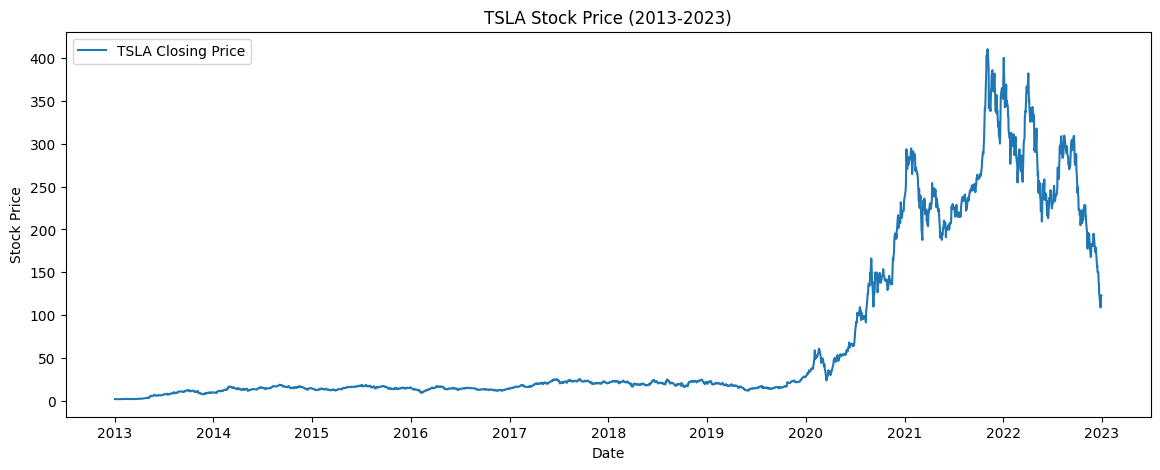

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for TSLA
df = yf.download('TSLA', start='2013-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='TSLA Closing Price')
plt.title('TSLA Stock Price (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

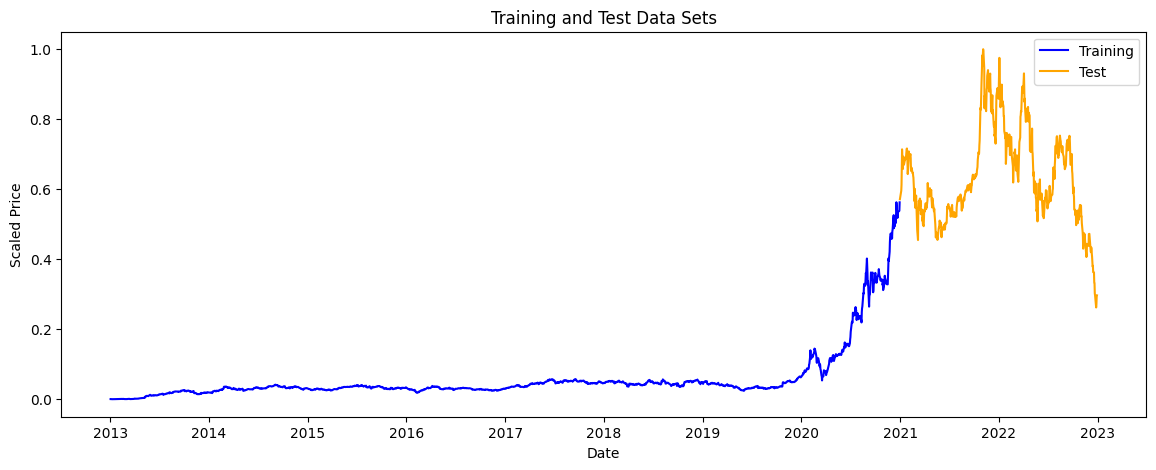

In [ ]:
# 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

In [ ]:
# min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 0.56274197369018
Test Data - Min: 0.2621684408838906 Max: 1.0


In [ ]:
# Training Data
train_start_date = df.index[0]  # Starting date of the training set
train_end_date = df.index[q_80 - 1]  # Ending date of the training set

# Test Data
test_start_date = df.index[q_80]  # Starting date of the test set
test_end_date = df.index[-1]  # Ending date of the test set

# Print the start and end dates for each dataset
print("Training Data - Start Date:", train_start_date, ", End Date:", train_end_date)
print("Test Data - Start Date:", test_start_date, ", End Date:", test_end_date)

Training Data - Start Date: 2013-01-02 00:00:00 , End Date: 2020-12-30 00:00:00
Test Data - Start Date: 2020-12-31 00:00:00 , End Date: 2022-12-30 00:00:00


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (2007, 7, 1)
X_test shape: (497, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0060 - mean_absolute_error: 0.0373 - mse: 0.0060
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3384e-04 - mean_absolute_error: 0.0047 - mse: 1.3384e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2021e-05 - mean_absolute_error: 0.0041 - mse: 8.2021e-05
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4952e-05 - mean_absolute_error: 0.0041 - mse: 7.4952e-05
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7918e-05 - mean_absolute_error: 0.0037 - mse: 6.7918e-05
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0521e-04 - mean_absolute_error: 0.0044 - mse: 1.0521e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8613e-05 - mean_absolute_error: 0.0044 - mse: 9.8613e-05
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7336e-05 - mean_absolute_error: 0.0040 - mse: 8.7336e-05
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1362e-05 - mean_absolut

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE: 16.323877303191203
MAE: 12.449489002496424
MSE: 266.4689702096409
Accuracy Percentage (R-squared): 91.51%


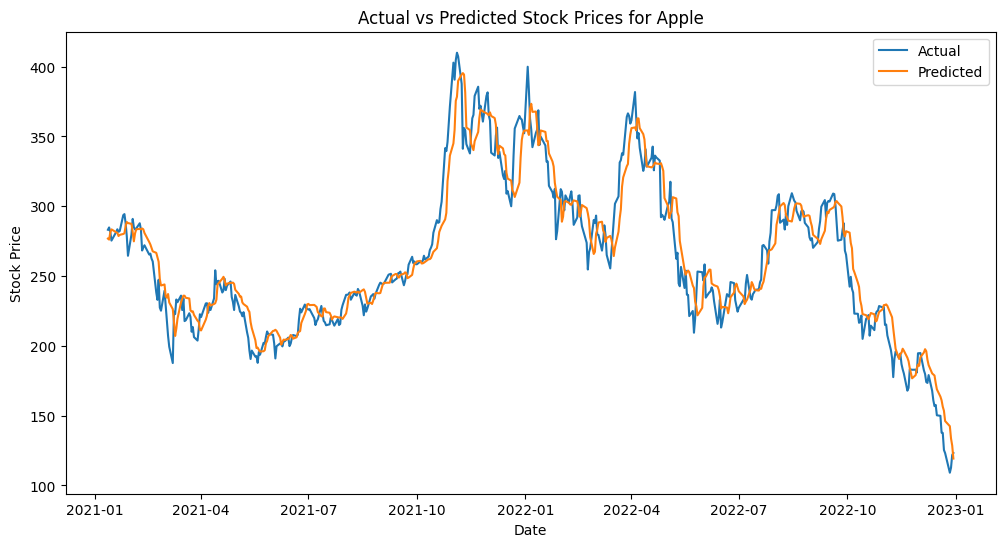

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN 5

[*********************100%***********************]  1 of 1 completed


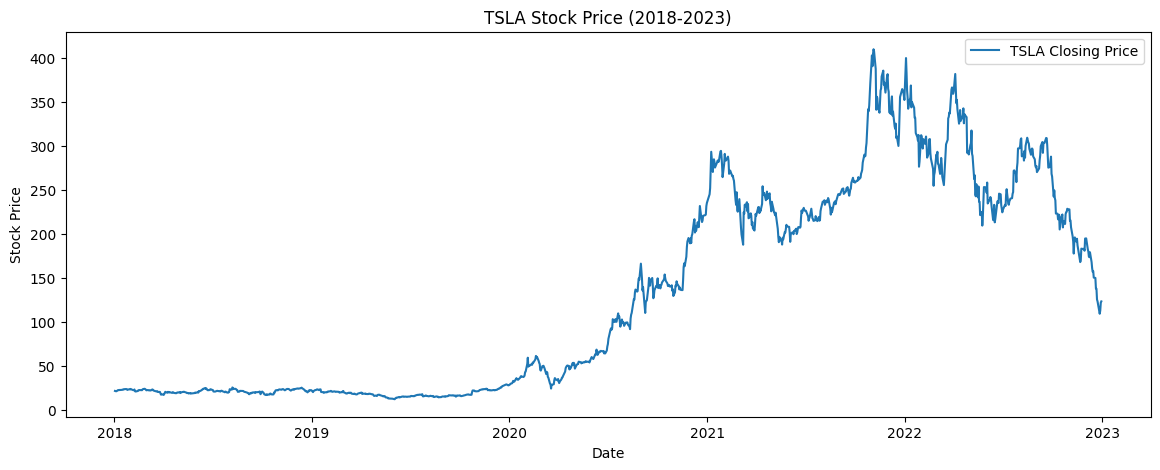

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for TSLA
df = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Plot the historical closing price data
plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='TSLA Closing Price')
plt.title('TSLA Stock Price (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

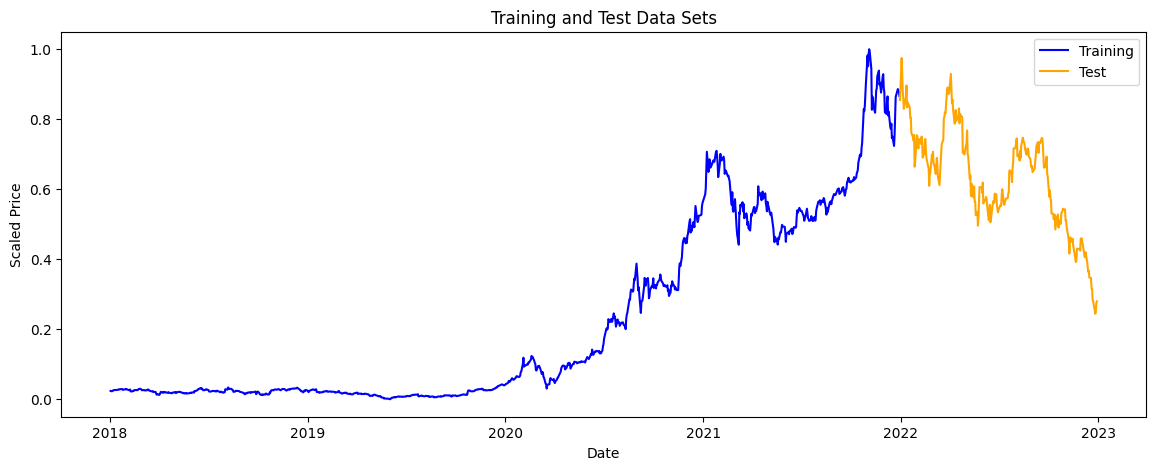

In [ ]:
# Define split points for the 80-20 split
q_80 = int(len(scaled_data) * 0.8)
q_20 = int(len(scaled_data) * 0.2)

# Split data into training and test sets using the new split
train_data = scaled_data[:q_80]  # 80% of the dataset for training
test_data = scaled_data[q_80:]  # Remaining 20% of the dataset for testing

# Plot the split data showing only training and test data
plt.figure(figsize=(14, 5))
plt.plot(df.index[:q_80], train_data, color='blue', label='Training')
plt.plot(df.index[q_80:], test_data, color='orange', label='Test')
plt.title('Training and Test Data Sets')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()


In [ ]:
# Calculate and print the min and max values for each dataset
print("Training Data - Min:", np.min(train_data), "Max:", np.max(train_data))
print("Test Data - Min:", np.min(test_data), "Max:", np.max(test_data))

Training Data - Min: 0.0 Max: 1.0
Test Data - Min: 0.24411865867141946 Max: 0.9747679415282888


In [ ]:
# Create sequences
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Reshape input for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1000, 7, 1)
X_test shape: (245, 7, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error

# Build CNN model
CNN_1 = Sequential(name='CNN_1')
CNN_1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
CNN_1.add(MaxPooling1D(pool_size=2))
CNN_1.add(MaxPooling1D(pool_size=1))
CNN_1.add(Flatten())
CNN_1.add(Dense(units=1))

# Compile and train the model
CNN_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mse'])

CNN_1.fit(X_train, y_train, epochs=50, batch_size=32)

CNN_1.summary()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0725 - mean_absolute_error: 0.1626 - mse: 0.0725
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 - mean_absolute_error: 0.0828 - mse: 0.0085 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - mean_absolute_error: 0.0243 - mse: 0.0011
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1245e-04 - mean_absolute_error: 0.0147 - mse: 7.1245e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9205e-04 - mean_absolute_error: 0.0151 - mse: 7.9205e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7375e-04 - mean_absolute_error: 0.0152 - mse: 7.7375e-04
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8419e-04 - mean_absolute_error: 0.0134 - mse: 6.8419e-04
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4796e-04 - mean_absolute_error: 0.0147 - mse: 7.4796e-04
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7535e-04 - mean_absolute_error: 0.0143

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 5, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,157 (4.52 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 772 (3.02 KB)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RMSE: 19.06338837055472
MAE: 15.51515244464485
MSE: 363.41277616660096
Accuracy Percentage (R-squared): 88.41%


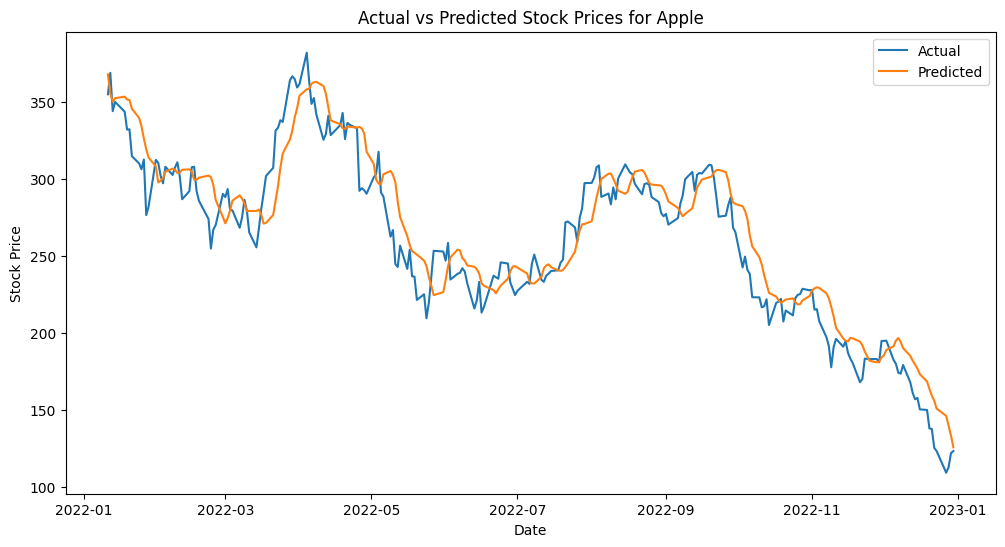

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
predictions = CNN_1.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices for Apple')
plt.show()

## CNN feature Engineering

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import mean_squared_error


# Download historical data for TSLA
df = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop missing values due to feature engineering
df.dropna(inplace=True)

# Print the first few rows of the DataFrame
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,RSI,Close_Lagged_1,Close_Lagged_2,Close_Lagged_3,Close_Lagged_4,Close_Lagged_5
Date,,,,,,,,,,,,,,
2018-10-16,17.713333,18.492001,17.482668,18.439333,18.439333,142896000,20.077240,20.861733,48.145150,17.306000,17.252001,16.815332,17.125334,17.520000
2018-10-17,18.826668,18.846666,17.719999,18.118668,18.118668,129832500,19.933520,20.845483,46.484493,18.439333,17.306000,17.252001,16.815332,17.125334
2018-10-18,17.952667,18.066668,17.533333,17.594000,17.594000,81318000,19.791613,20.827703,43.821144,18.118668,18.439333,17.306000,17.252001,16.815332
2018-10-19,17.826000,17.977333,16.900000,17.333332,17.333332,140632500,19.668347,20.809497,42.517744,17.594000,18.118668,18.439333,17.306000,17.252001
2018-10-22,17.378668,17.457333,16.839333,17.396667,17.396667,84004500,19.542293,20.790953,42.961664,17.333332,17.594000,18.118668,18.439333,17.306000


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define split points
q_80 = int(len(scaled_data) * 0.8)
q_90 = int(len(scaled_data) * 0.9)

# Split data into training, validation, and test sets
train_data = scaled_data[:q_80]
val_data = scaled_data[q_80:q_90]
test_data = scaled_data[q_90:]

# Create sequences (with 0 lag)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, 1:])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import time
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Build CNN model with improved architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, len(features)-1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Start the stopwatch
start_time = time.time()

# Train the model / early stopping callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Stop the stopwatch
end_time = time.time()

# Calculate and display the training time
training_time_seconds = end_time - start_time
print('Training Time: {:.2f} seconds'.format(training_time_seconds))

# Display model summary
model.summary()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0992 - mean_absolute_error: 0.1914 - val_loss: 0.0063 - val_mean_absolute_error: 0.0594
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mean_absolute_error: 0.0646 - val_loss: 0.0068 - val_mean_absolute_error: 0.0689
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0555 - val_loss: 0.0056 - val_mean_absolute_error: 0.0548
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0480 - val_loss: 0.0048 - val_mean_absolute_error: 0.0518
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - mean_absolute_error: 0.0495 - val_loss: 0.0083 - val_mean_absolute_error: 0.0707
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0498 - val_loss: 0.0047 - val_mean_absolute_error: 0.0516
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - mean_absolute_error: 0.0501 - val_loss: 0.0098 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 8, 64)               │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,573 (115.52 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,716 (77.02 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE: 20.795674835837307
MAE: 17.466956981876056
MSE: 432.46009187787695
Accuracy Percentage (R-squared): 86.17%


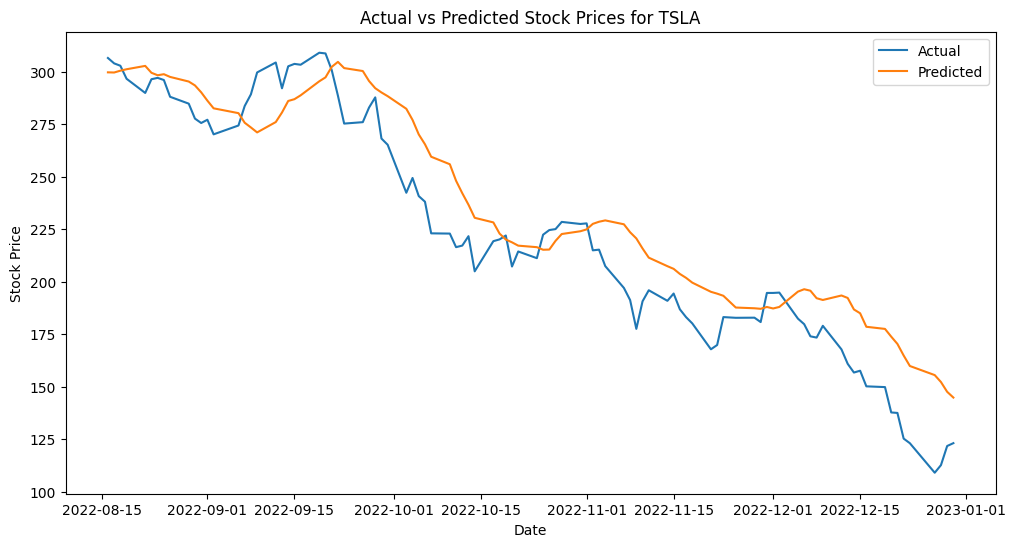

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), len(features)-1))), axis=1))[:, 0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), len(features)-1))), axis=1))[:, 0]

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)

accuracy_percentage = r_squared * 100
print('Accuracy Percentage (R-squared): {:.2f}%'.format(accuracy_percentage))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

## CNN hypertuining parameters

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Split data and reshape for CNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#70 / 15 / 15 split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

# Reshape for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Model 1: Basic CNN
model1 = Sequential()
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: CNN with Dropout
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))  # Added dropout
model2.add(Flatten())
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper CNN
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Added another Conv1D layer
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic CNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (CNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper CNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0753 - val_loss: 0.0068
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - val_loss: 7.4069e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9248e-04 - val_loss: 7.3555e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 7.2875e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2683e-04 - val_loss: 7.1622e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1462e-04 - val_loss: 7.1524e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6893e-04 - val_loss: 7.1120e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0055e-04 - val_loss: 7.0441e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4539e-04 - val_loss: 6.9670e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7640e-04 - val_loss: 7.0259e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4941e-04 - val_loss: 6.8924e-04
Ep

## CNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Feature Selection
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardize features
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Fit and transform the features
X = scaler.fit_transform(X)


# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters bet settings
    for _ in range(hp.Int('num_layers', 1, 2)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    # Function contains the model architecture and tuning code
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Reloading Tuner from project_dir/CNN1_Stock_Prediction/tuner0.json
Best Hyperparameters:
Number of Layers: 1
Filters: 96
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 205.8819 - mean_absolute_error: 6.9327 - mean_squared_error: 205.8819 - val_loss: 224.8443 - val_mean_absolute_error: 12.1559 - val_mean_squared_error: 224.8443
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129.2145 - mean_absolute_error: 6.4493 - mean_squared_error: 129.2145 - val_loss: 529.8439 - val_mean_absolute_error: 19.5043 - val_mean_squared_error: 529.8439
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259.3165 - mean_absolute_error: 8.6630 - mean_squared_error: 259.3165 - val_loss: 1127.7900 - val_mean_absolute_error: 31.1155 - val_mean_squared_error: 1127.7900
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 184.8346 - mean_absolute_error: 6.9209 - mean_squared_error: 184.8346 - val_loss: 202.5343 - val_mean_absolute_error: 10.1178 - val_mean_squared_error: 202.5343
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 206.3224 - mean_absolute_error: 7.3423 - mean_squared_error: 206.3224 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 387.6092 - mean_absolute_error: 10.1854 - mean_squared_error: 387.6092 - val_loss: 270.5872 - val_mean_absolute_error: 13.0123 - val_mean_squared_error: 270.5872
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323.4614 - mean_absolute_error: 9.6624 - mean_squared_error: 323.4614 - val_loss: 352.9291 - val_mean_absolute_error: 14.6079 - val_mean_squared_error: 352.9291
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 435.0346 - mean_absolute_error: 11.3399 - mean_squared_error: 435.0346 - val_loss: 374.4788 - val_mean_absolute_error: 15.0763 - val_mean_squared_error: 374.4788
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 382.2070 - mean_absolute_error: 9.4740 - mean_squared_error: 382.2070 - val_loss: 765.1443 - val_mean_absolute_error: 23.3053 - val_mean_squared_error: 765.1443
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 397.0215 - mean_absolute_error: 10.3002 - mean_squared_error: 397.0215 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 17.3512 - mean_absolute_error: 3.0528 - mean_squared_error: 17.3512 - val_loss: 232.3042 - val_mean_absolute_error: 12.5922 - val_mean_squared_error: 232.3042
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.7510 - mean_absolute_error: 3.1288 - mean_squared_error: 19.7510 - val_loss: 329.6841 - val_mean_absolute_error: 15.0454 - val_mean_squared_error: 329.6841
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.5491 - mean_absolute_error: 2.9060 - mean_squared_error: 16.5491 - val_loss: 225.8038 - val_mean_absolute_error: 12.4034 - val_mean_squared_error: 225.8038
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.2100 - mean_absolute_error: 3.0751 - mean_squared_error: 21.2100 - val_loss: 107.5747 - val_mean_absolute_error: 8.3101 - val_mean_squared_error: 107.5747
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.5886 - mean_absolute_error: 3.0821 - mean_squared_error: 19.5886 - val_loss: 641.1

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


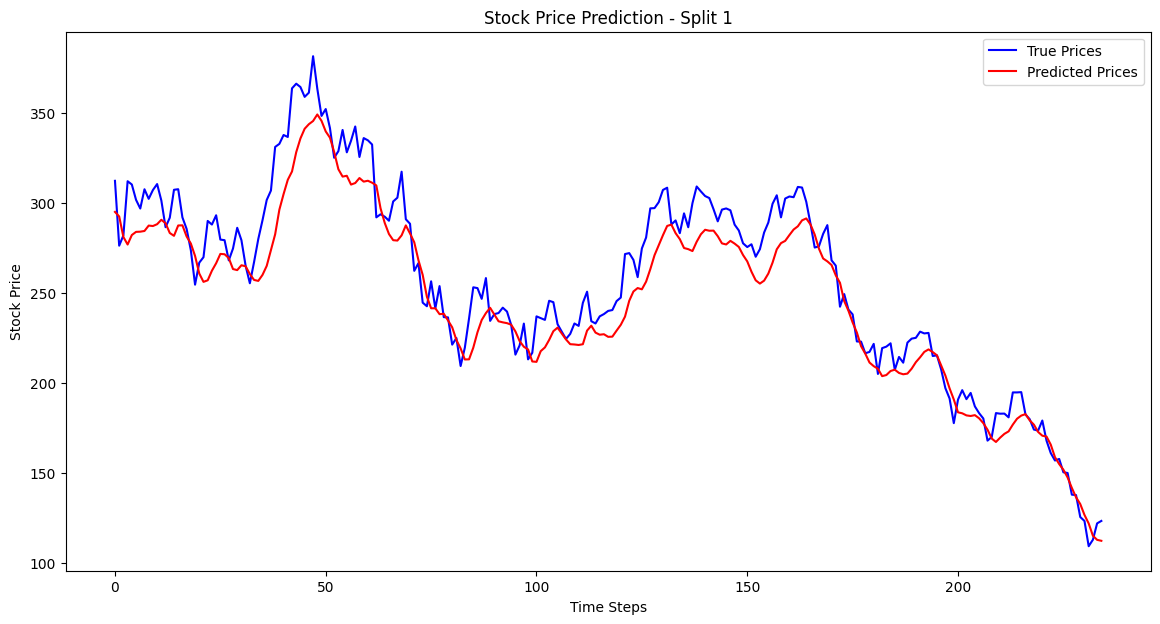

Split 1: MSE: 283.2985226343673, RMSE: 16.831474166999374, MAE: 13.44384551352643, R²: 0.9056829090419029
Split 2: MSE: 165.75247104977115, RMSE: 12.874489156847007, MAE: 10.321647449663491, R²: 0.9300251027384446
Split 3: MSE: 670.7920423469922, RMSE: 25.899653324841864, MAE: 22.71027128079448, R²: 0.8273249702964428


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 283.2985226343673, RMSE: 16.831474166999374, MAE: 13.44384551352643, R²: 0.9056829090419029
Metrics for the 80/10/10 split: MSE: 165.75247104977115, RMSE: 12.874489156847007, MAE: 10.321647449663491, R²: 0.9300251027384446
Metrics for the 60/20/20 split: MSE: 670.7920423469922, RMSE: 25.899653324841864, MAE: 22.71027128079448, R²: 0.8273249702964428


In [ ]:
CNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 96)               │           1,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 96)               │          18,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 96)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,773 (237.40 KB)

 Trainable params: 20,257 (79.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,516 (158.27 KB)

In [ ]:
# Save the best model
CNN_1_model_2.save('CNN1_best_model.h5')

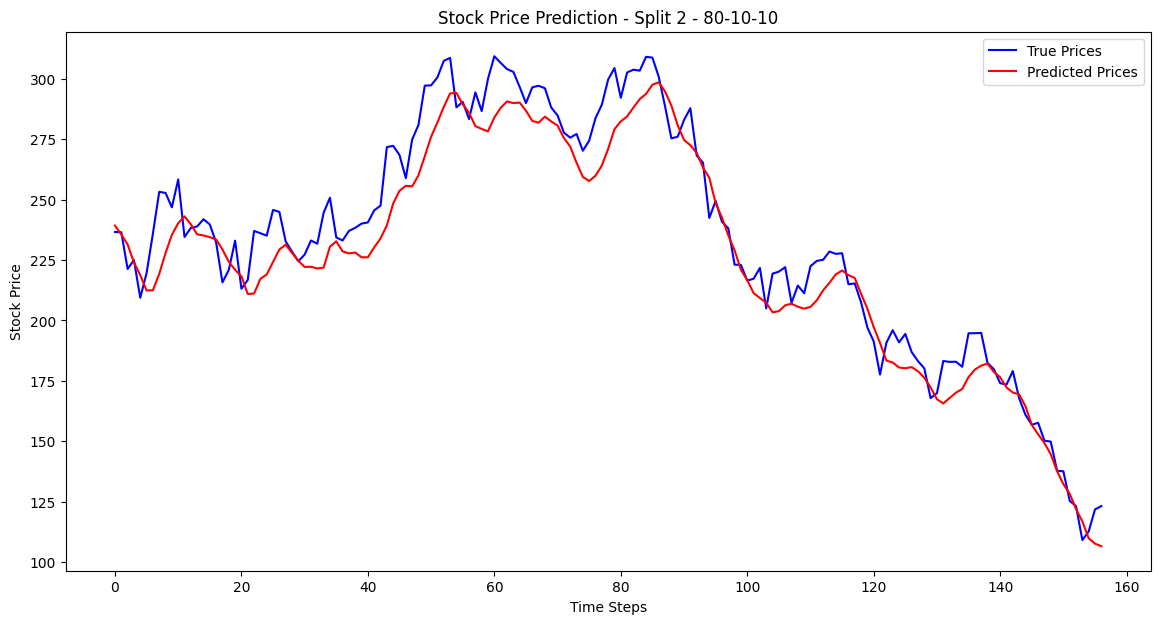

Split 1: MSE: 165.75247104977115, RMSE: 12.874489156847007, MAE: 10.321647449663491, R²: 0.9300251027384446


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2 - 80-10-10')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CNN1_best_model.h5')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_2)

## CNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/CNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

<ipython-input-43-73ffdd1e2446>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch
[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Increase input layer filters but be mindful of size
    model.add(Conv1D(filters=hp.Int('filters', min_value=128, max_value=256, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Added Batch Normalization
    model.add(BatchNormalization())

    # Add more Conv1D layers, but adjust sizes dynamically
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))  # Keeps pooling size at 1 for control
        model.add(Dropout(hp.Float('dropout_2_' + str(i), 0.2, 0.5, step=0.1)))

    model.add(Flatten())

    # Adjust regularization
    l2_reg = hp.Float('l2_regularization', 0.01, 0.1, step=0.01)
    model.add(Dense(1, kernel_regularizer=l2(l2_reg)))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-4, 1e-5, 1e-6, 1e-7])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    # Print model summary
    model.summary()

    return model

In [ ]:
def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test):
    global best_model, best_mse, best_params

    # Hyperparameter tuning setup
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN2_Stock_Prediction'
    )

    # Search for the best hyperparameters
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Get the best model and its hyperparameters
    current_model = tuner.get_best_models(num_models=1)[0]
    best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

    # Model Training
    history = current_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation on the test set
    y_pred = current_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, current_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_2_model_1 = run_experiment(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_2_model_2 = run_experiment(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_2_model_3 = run_experiment(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 36s]
val_loss: 173.8855743408203

Best val_loss So Far: 173.8855743408203
Total elapsed time: 00h 05m 43s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 176)              │           2,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 176)              │             704 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,385 (985.88 KB)

 Trainable params: 252,033 (984.50 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 154.1215 - mean_absolute_error: 6.7222 - mean_squared_error: 153.9512 - val_loss: 520.4332 - val_mean_absolute_error: 19.4124 - val_mean_squared_error: 520.2652
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 140.8906 - mean_absolute_error: 6.8985 - mean_squared_error: 140.7233 - val_loss: 445.7256 - val_mean_absolute_error: 17.7268 - val_mean_squared_error: 445.5603
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 139.5323 - mean_absolute_error: 7.2092 - mean_squared_error: 139.3675 - val_loss: 395.0541 - val_mean_absolute_error: 16.5292 - val_mean_squared_error: 394.8909
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 147.2228 - mean_absolute_error: 6.9863 - mean_squared_error: 147.0602 - val_loss: 200.3933 - val_mean_absolute_error: 10.5894 - val_mean_squared_error: 200.2323
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 141.3719 - mean_absolute_error: 6.7196 - mean_squared_error: 141.2113 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 176)              │           2,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 176)              │             704 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,385 (985.88 KB)

 Trainable params: 252,033 (984.50 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 562.1372 - mean_absolute_error: 13.2286 - mean_squared_error: 561.9666 - val_loss: 1593.8966 - val_mean_absolute_error: 35.5972 - val_mean_squared_error: 1593.7284
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 377.5414 - mean_absolute_error: 10.8009 - mean_squared_error: 377.3737 - val_loss: 567.6454 - val_mean_absolute_error: 19.5073 - val_mean_squared_error: 567.4800
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 424.6662 - mean_absolute_error: 11.4345 - mean_squared_error: 424.5013 - val_loss: 578.7759 - val_mean_absolute_error: 19.6300 - val_mean_squared_error: 578.6133
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 474.1544 - mean_absolute_error: 11.6351 - mean_squared_error: 473.9920 - val_loss: 309.1808 - val_mean_absolute_error: 13.8810 - val_mean_squared_error: 309.0198
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 389.3605 - mean_absolute_error: 10.4958 - mean_squared_error: 389.2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 176)              │           2,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 176)              │             704 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 1, 176)              │          62,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 176)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 176)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,385 (985.88 KB)

 Trainable params: 252,033 (984.50 KB)

 Non-trainable params: 352 (1.38 KB)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 54.9635 - mean_absolute_error: 5.4195 - mean_squared_error: 54.7942 - val_loss: 4645.2637 - val_mean_absolute_error: 65.8044 - val_mean_squared_error: 4645.0981
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 25.0813 - mean_absolute_error: 3.9105 - mean_squared_error: 24.9163 - val_loss: 2292.4319 - val_mean_absolute_error: 45.7426 - val_mean_squared_error: 2292.2686
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.5191 - mean_absolute_error: 3.8466 - mean_squared_error: 26.3565 - val_loss: 2060.9939 - val_mean_absolute_error: 43.1187 - val_mean_squared_error: 2060.8333
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.3586 - mean_absolute_error: 3.8013 - mean_squared_error: 24.1985 - val_loss: 1983.3512 - val_mean_absolute_error: 42.2171 - val_mean_squared_error: 1983.1931
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 29.2389 - mean_absolute_error: 3.9828 - mean_squared_error: 29.0813 - va

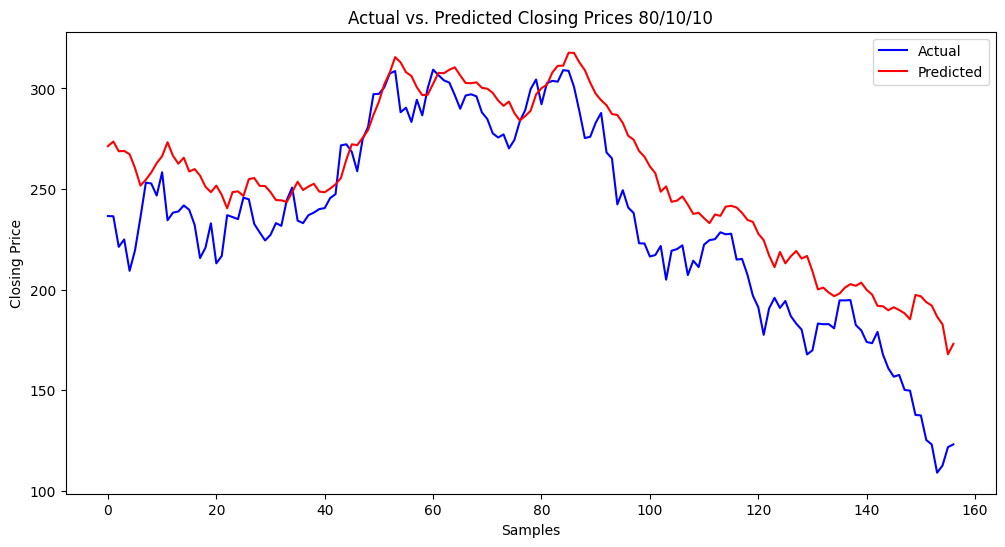

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## CNN Combine 3

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Compute MACD
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()

    # Compute Bollinger Bands
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)

    # Calculate Volatility as Percentage Change
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()

    # Extract Day, Month, Year
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Create a MinMaxScaler instance and fit data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Function to build model
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add first Conv1D layer
    model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=1))

    # Adding additional Conv1D layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(Conv1D(filters=hp.Int('filters', min_value=64, max_value=128, step=16), kernel_size=2, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    model.add(Flatten())
    model.add(Dense(1))  # Output layer for regression
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):

    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='CNN3_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Filters: {best_hyperparameters.get('filters')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, CNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, CNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, CNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 14s]
val_loss: 236.3848876953125

Best val_loss So Far: 135.13015747070312
Total elapsed time: 00h 02m 35s
Best Hyperparameters:
Number of Layers: 3
Filters: 128
Dropout Rate: 0.5
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 425.0759 - mean_absolute_error: 10.1301 - mean_squared_error: 425.0759 - val_loss: 1361.7236 - val_mean_absolute_error: 34.7704 - val_mean_squared_error: 1361.7236
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 659.4987 - mean_absolute_error: 13.0861 - mean_squared_error: 659.4987 - val_loss: 7611.7197 - val_mean_absolute_error: 85.2281 - val_mean_squared_error: 7611.7197
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 604.5310 - mean_absolute_error: 13.5209 - mean_squared_error: 604.5310 - val_loss: 164.4176 - val_mean_absolute_error: 9.3080 - val_mean_squared_error: 164.4176
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 344.8167 - mean_absolute_error: 9.4982 - mean_squared_error: 344.8167 - val_loss: 429.0859 - val_mean_absolute_error: 17.1559 - val_mean_squared_error: 429.0859
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 345.7430 - mean_absolute_error: 9.2855 - mean_squared_error: 345.7

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 1015.0402 - mean_absolute_error: 16.9642 - mean_squared_error: 1015.0402 - val_loss: 398.2722 - val_mean_absolute_error: 15.8378 - val_mean_squared_error: 398.2722
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 845.5464 - mean_absolute_error: 15.2978 - mean_squared_error: 845.5464 - val_loss: 5091.4971 - val_mean_absolute_error: 68.9941 - val_mean_squared_error: 5091.4971
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1277.3928 - mean_absolute_error: 20.1716 - mean_squared_error: 1277.3928 - val_loss: 507.1987 - val_mean_absolute_error: 18.6421 - val_mean_squared_error: 507.1987
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 670.6287 - mean_absolute_error: 14.6411 - mean_squared_error: 670.6287 - val_loss: 1101.8390 - val_mean_absolute_error: 29.9475 - val_mean_squared_error: 1101.8390
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 798.1503 - mean_absolute_error: 14.8899 - mean_squared_error: 79

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 42.3363 - mean_absolute_error: 4.7607 - mean_squared_error: 42.3363 - val_loss: 393.0917 - val_mean_absolute_error: 17.0119 - val_mean_squared_error: 393.0917
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.3744 - mean_absolute_error: 4.9689 - mean_squared_error: 48.3744 - val_loss: 213.0424 - val_mean_absolute_error: 11.5375 - val_mean_squared_error: 213.0424
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.7521 - mean_absolute_error: 4.5672 - mean_squared_error: 37.7521 - val_loss: 350.4659 - val_mean_absolute_error: 15.5449 - val_mean_squared_error: 350.4659
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.5424 - mean_absolute_error: 4.8267 - mean_squared_error: 40.5424 - val_loss: 707.7772 - val_mean_absolute_error: 23.9534 - val_mean_squared_error: 707.7772
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.7374 - mean_absolute_error: 4.7941 - mean_squared_error: 46.7374 - val_loss: 448.

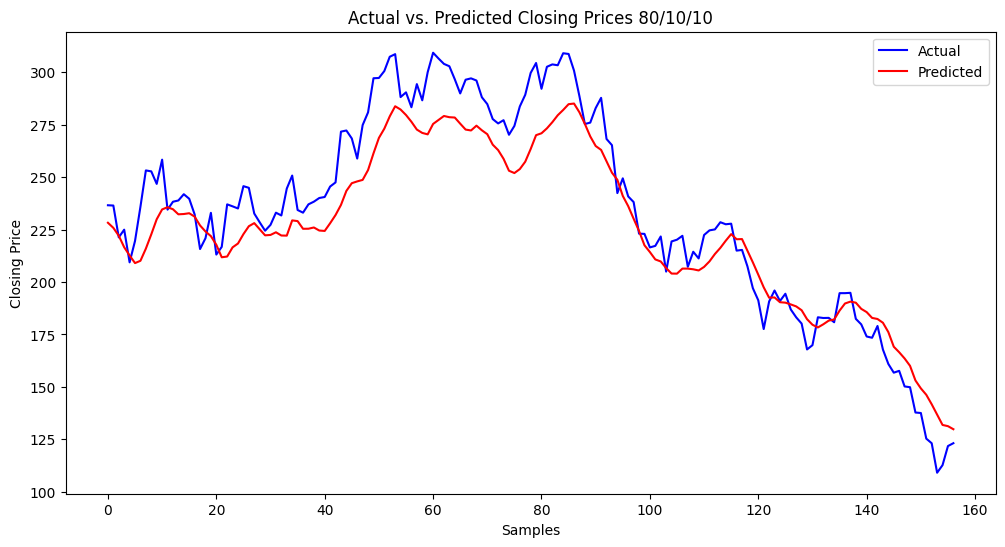

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# RNN

## RNN 10

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get TSLA stock data for the past 10 years
data = yf.download('TSLA', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0138 - mae: 0.0640 - mse: 0.0138
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 1.5797e-04 - mae: 0.0077 - mse: 1.5797e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.4629e-04 - mae: 0.0063 - mse: 1.4629e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.0442e-04 - mae: 0.0054 - mse: 1.0442e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 1.1959e-04 - mae: 0.0061 - mse: 1.1959e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 1.3742e-04 - mae: 0.0080 - mse: 1.3742e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.2883e-04 - mae: 0.0075 - mse: 1.2883e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 7.4463e-05 - mae: 0.0050 - mse: 7.4463e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.3214e-04 - mae: 0.0081 - mse: 1.3214e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.7922e-05 - mae: 0.0053 - mse

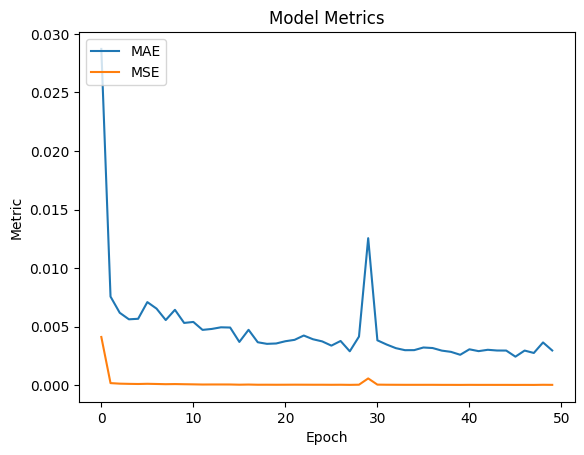

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN 5 Years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get TSLA stock data for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the RNN
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0891 - mae: 0.1790 - mse: 0.0891
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0013 - mae: 0.0258 - mse: 0.0013
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6.4657e-04 - mae: 0.0170 - mse: 6.4657e-04
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 6.2868e-04 - mae: 0.0156 - mse: 6.2868e-04
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 6.3504e-04 - mae: 0.0168 - mse: 6.3504e-04
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.1465e-04 - mae: 0.0154 - mse: 5.1465e-04
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 4.2527e-04 - mae: 0.0130 - mse: 4.2527e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4.1504e-04 - mae: 0.0130 - mse: 4.1504e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 4.3909e-04 - mae: 0.0133 - mse: 4.3909e-04
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.0134e-04 - mae: 0.0136 - mse: 4.0134e-04
Epoch 

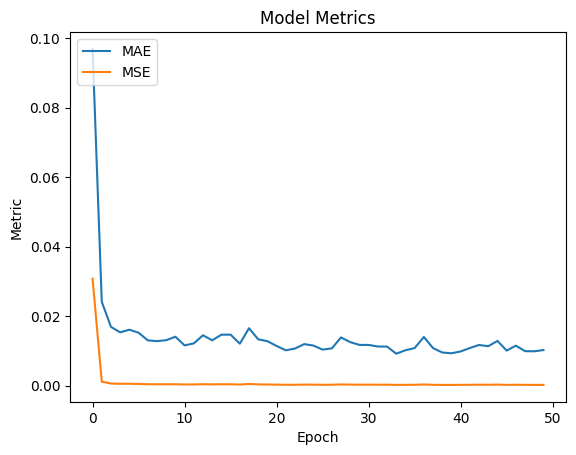

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## RNN Feature Engineering

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for TSLA for 7 years
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('TSLA', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

# Calculate RSI
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare data
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
data = df[features].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data (70/15/15 split)
train_size = int(len(scaled_data) * 0.7)
val_size = int(len(scaled_data) * 0.15)
test_size = len(scaled_data) - train_size - val_size
train_data = scaled_data[:train_size]
val_data = scaled_data[train_size:train_size + val_size]
test_data = scaled_data[train_size + val_size:]

In [ ]:
# Create sequences for predicting 'Close' price
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7  # 7-day lag
target_feature_index = features.index('Close')
X_train, y_train = create_sequences(train_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
# Build RNN model to predict 'Close' value
RNN3 = Sequential()
RNN3.add(SimpleRNN(units=64, activation='relu', input_shape=(seq_length, len(features))))
RNN3.add(Dense(units=1))

# Compile the model
RNN3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])

# Train the model
history = RNN3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0082 - mae: 0.0521 - mape: 20249.3613 - mse: 0.0082 - val_loss: 0.0026 - val_mae: 0.0346 - val_mape: 5.2487 - val_mse: 0.0026
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3791e-04 - mae: 0.0140 - mape: 994.4593 - mse: 4.3791e-04 - val_loss: 0.0026 - val_mae: 0.0374 - val_mape: 5.6988 - val_mse: 0.0026
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1555e-04 - mae: 0.0092 - mape: 397.1256 - mse: 2.1555e-04 - val_loss: 0.0029 - val_mae: 0.0409 - val_mape: 6.2700 - val_mse: 0.0029
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9349e-04 - mae: 0.0081 - mape: 241.7301 - mse: 1.9349e-04 - val_loss: 0.0025 - val_mae: 0.0366 - val_mape: 5.5670 - val_mse: 0.0025
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9619e-04 - mae: 0.0080 - mape: 550.3107 - mse: 1.9619e-04 - val_loss: 0.0024 - val_mae: 0.0365 - val_mape: 5.5755 - val_mse: 0.0024
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/

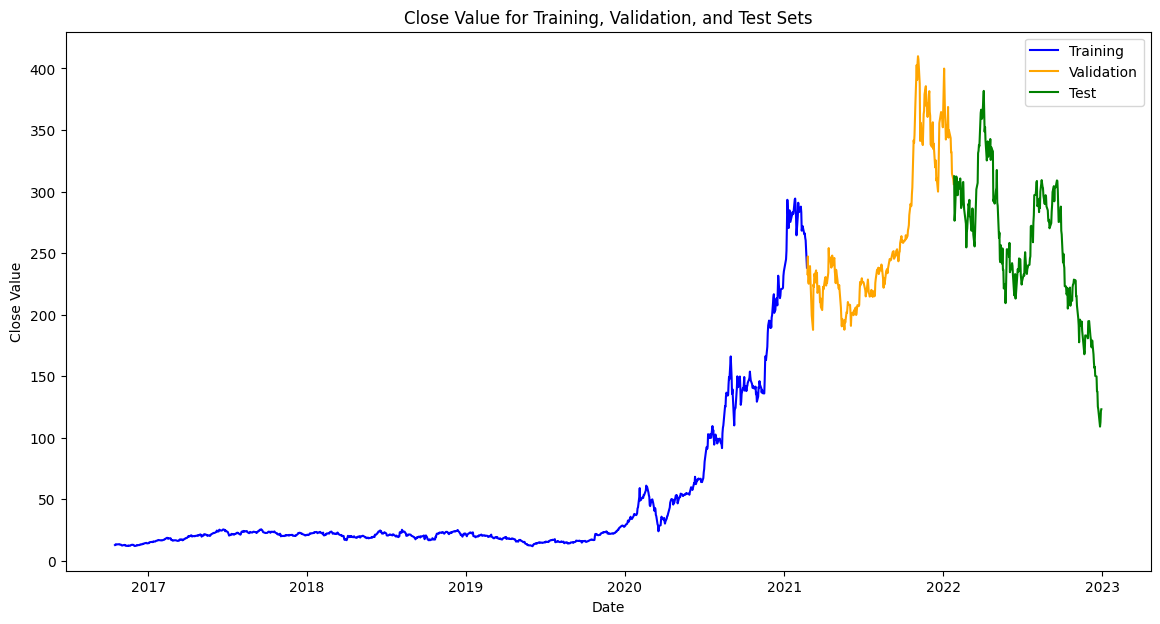

In [ ]:
import matplotlib.pyplot as plt

# Obtain the dates for each subset
train_dates = df.index[:train_size]
val_dates = df.index[train_size:train_size + val_size]
test_dates = df.index[train_size + val_size:]

# Obtain the close values for each subset
train_close = df['Close'][:train_size]
val_close = df['Close'][train_size:train_size + val_size]
test_close = df['Close'][train_size + val_size:]

# Plot the close value for each subset
plt.figure(figsize=(14, 7))
plt.plot(train_dates, train_close, label='Training', color='blue')
plt.plot(val_dates, val_close, label='Validation', color='orange')
plt.plot(test_dates, test_close, label='Test', color='green')

plt.title('Close Value for Training, Validation, and Test Sets')
plt.xlabel('Date')
plt.ylabel('Close Value')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
RMSE: 13.91374362030858
MAE: 11.227255952818643
MSE: 193.5922615316777
R-squared: 0.9362255920234236


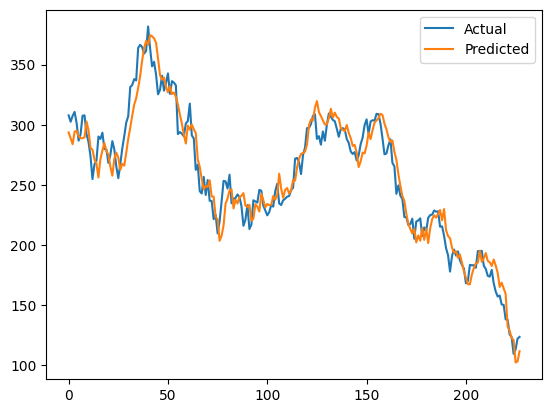

In [ ]:
# Make predictions for 'Close' value
predictions = RNN3.predict(X_test).flatten()  # Flatten predictions to (228,)
predictions = np.expand_dims(predictions, axis=1)  # Reshape predictions to (228,1)
predictions = np.concatenate((predictions, np.zeros((len(predictions), len(features) - 1))), axis=1)  # Add zeros to match the input shape
predictions = scaler.inverse_transform(predictions)[:, 0]  # Inverse transform and extract the first column

y_test = y_test.reshape(-1, 1)  # Reshape 'y_test' to match predictions
y_test = np.concatenate((y_test, np.zeros((len(y_test), len(features) - 1))), axis=1)  # Add zeros to match input shape
y_test = scaler.inverse_transform(y_test)[:, 0]  # Inverse transform and extract the first column

# Evaluate the model for 'Close' value prediction
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics for 'Close' value prediction
print('RMSE:', rmse)
print('MAE:', mae)
print('MSE:', mse)
print('R-squared:', r2)


# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

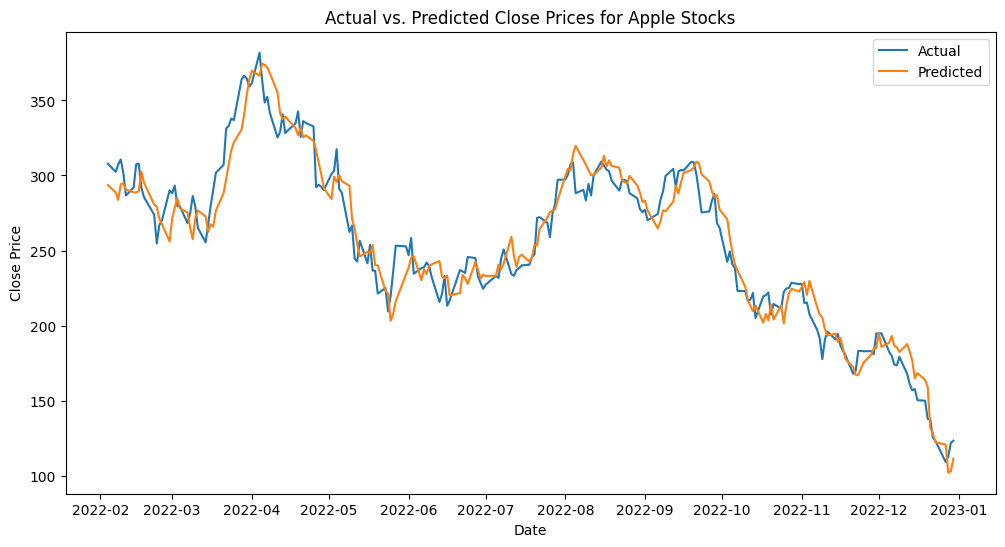

In [ ]:
# Get the original dates for the test set
original_dates = df.index[train_size + val_size + seq_length:]
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(original_dates, y_test, label='Actual')
plt.plot(original_dates, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices for Apple Stocks')
plt.legend()
plt.show()

## RNN hypertunining parameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Model 1: Basic RNN
model1 = Sequential()
model1.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

# Model 2: RNN with Dropout
model2 = Sequential()
model2.add(SimpleRNN(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

# Model 3: Deeper RNN
model3 = Sequential()
model3.add(SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(SimpleRNN(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

# Evaluate models on test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic RNN) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (RNN with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper RNN) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0131 - val_loss: 2.6694e-04
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0931e-04 - val_loss: 2.3664e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9230e-04 - val_loss: 2.5533e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0850e-04 - val_loss: 4.7127e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0454e-04 - val_loss: 1.9693e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1871e-04 - val_loss: 1.8937e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2307e-04 - val_loss: 1.9704e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9726e-04 - val_loss: 1.7615e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0931e-04 - val_loss: 1.8503e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9376e-04 - val_loss: 2.1550e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4670e-04 - val_loss: 

## RNN Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import EarlyStopping


# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
def feature_engineering(df):
    # Compute SMA
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    # Compute RSI
    df['RSI'] = compute_rsi(df['Close'])

    # Create lagged features
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Select only the specified feature columns
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare data
X = df[feature_columns].values
y = df['Close'].values

# Standardise features and fit
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for CNN
X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
def build_model(hp):
    model = Sequential()
    for _ in range(hp.Int('num_layers', 1, 3)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10), activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    model.add(Flatten())
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error'])
    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

Trial 10 Complete [00h 00m 10s]
val_loss: 231.74163818359375

Best val_loss So Far: 188.4796600341797
Total elapsed time: 00h 02m 47s
Best Hyperparameters:
Number of Layers: 3
units: 140
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 403.9084 - mean_absolute_error: 9.4875 - mean_squared_error: 403.9084 - val_loss: 152.4861 - val_mean_absolute_error: 9.0325 - val_mean_squared_error: 152.4861
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 350.7373 - mean_absolute_error: 9.9373 - mean_squared_error: 350.7373 - val_loss: 825.4636 - val_mean_absolute_error: 25.9548 - val_mean_squared_error: 825.4636
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 274.6160 - mean_absolute_error: 8.1402 - mean_squared_error: 274.6160 - val_loss: 2163.9568 - val_mean_absolute_error: 44.4243 - val_mean_squared_error: 2163.9568
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 291.6878 - mean_absolute_error: 8.9918 - mean_squared_error: 291.6878 - val_loss: 186.7397 - val_mean_absolute_error: 9.2347 - val_mean_squared_error: 186.7397
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 260.2812 - mean_absolute_error: 8.2287 - mean_squared_error: 260.2812 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 628.2135 - mean_absolute_error: 13.6158 - mean_squared_error: 628.2135 - val_loss: 1403.1041 - val_mean_absolute_error: 33.0610 - val_mean_squared_error: 1403.1041
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 596.0422 - mean_absolute_error: 12.5517 - mean_squared_error: 596.0422 - val_loss: 356.0111 - val_mean_absolute_error: 14.6802 - val_mean_squared_error: 356.0111
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 428.5403 - mean_absolute_error: 11.2903 - mean_squared_error: 428.5403 - val_loss: 742.4332 - val_mean_absolute_error: 22.4061 - val_mean_squared_error: 742.4332
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 761.2112 - mean_absolute_error: 15.3035 - mean_squared_error: 761.2112 - val_loss: 1111.6865 - val_mean_absolute_error: 29.0977 - val_mean_squared_error: 1111.6865
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 481.3887 - mean_absolute_error: 11.9595 - mean_squared_error: 481.38

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 39.0809 - mean_absolute_error: 4.4655 - mean_squared_error: 39.0809 - val_loss: 2042.1021 - val_mean_absolute_error: 39.5636 - val_mean_squared_error: 2042.1021
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 26.8475 - mean_absolute_error: 3.5169 - mean_squared_error: 26.8475 - val_loss: 2304.0144 - val_mean_absolute_error: 42.0251 - val_mean_squared_error: 2304.0144
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.5065 - mean_absolute_error: 3.3810 - mean_squared_error: 21.5065 - val_loss: 5855.4268 - val_mean_absolute_error: 70.3655 - val_mean_squared_error: 5855.4268
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28.3329 - mean_absolute_error: 3.6633 - mean_squared_error: 28.3329 - val_loss: 3028.5269 - val_mean_absolute_error: 48.9708 - val_mean_squared_error: 3028.5269
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 26.4322 - mean_absolute_error: 3.5307 - mean_squared_error: 26.4322 - val_l

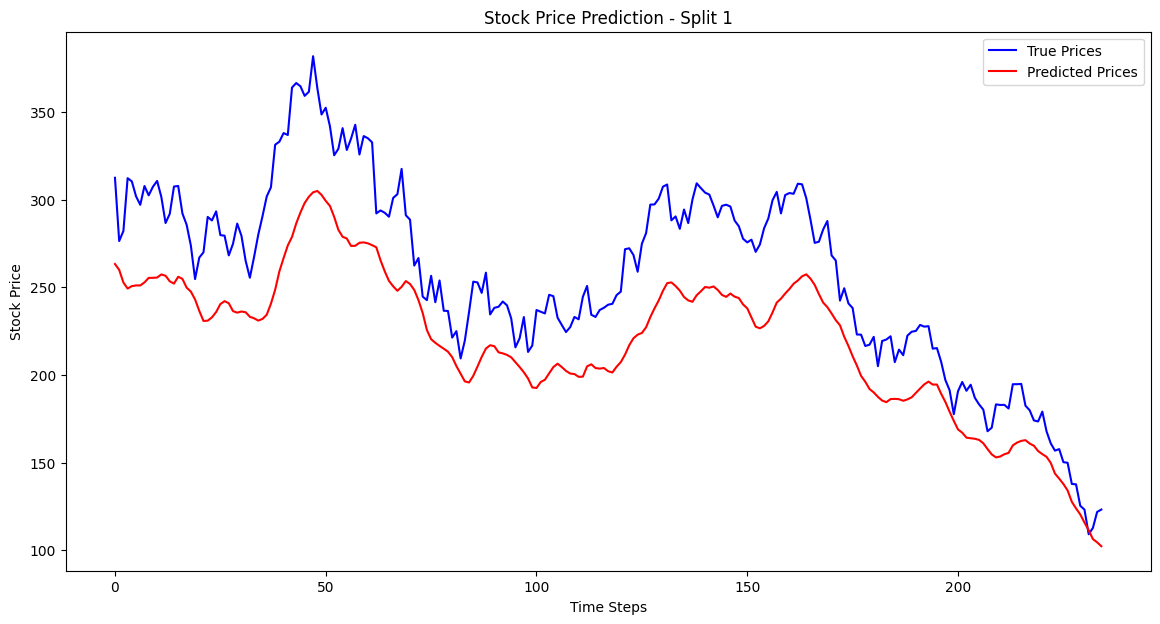

Split 1: MSE: 1712.1704597868697, RMSE: 41.378381551081354, MAE: 37.640158113520194, R²: 0.42997607086040246
Split 2: MSE: 204.12121368288345, RMSE: 14.287099554594118, MAE: 11.680395624440187, R²: 0.9138271612730597
Split 3: MSE: 4694.409330685578, RMSE: 68.51575972493904, MAE: 66.12769095813886, R²: -0.2084330454794978


In [ ]:
# For split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)

mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_1_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# For split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)

mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_1_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# For split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)

mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_1_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_1, label='True Prices', color='blue')
plt.plot(y_pred_1, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results for each split
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")
print(f"Split 3: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}")

In [ ]:
# Compare MSE, RMSE, MAE, and R2 from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 1712.1704597868697, RMSE: 41.378381551081354, MAE: 37.640158113520194, R²: 0.42997607086040246
Metrics for the 80/10/10 split: MSE: 204.12121368288345, RMSE: 14.287099554594118, MAE: 11.680395624440187, R²: 0.9138271612730597
Metrics for the 60/20/20 split: MSE: 4694.409330685578, RMSE: 68.51575972493904, MAE: 66.12769095813886, R²: -0.2084330454794978


In [ ]:
RNN_1_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 140)              │          20,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 140)              │          39,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 1, 140)              │          39,340 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             141 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 299,045 (1.14 MB)

 Trainable params: 99,681 (389.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,364 (778.77 KB)

In [ ]:
# Save the best model
RNN_1_model_2.save('RNN1_best_model.h5')

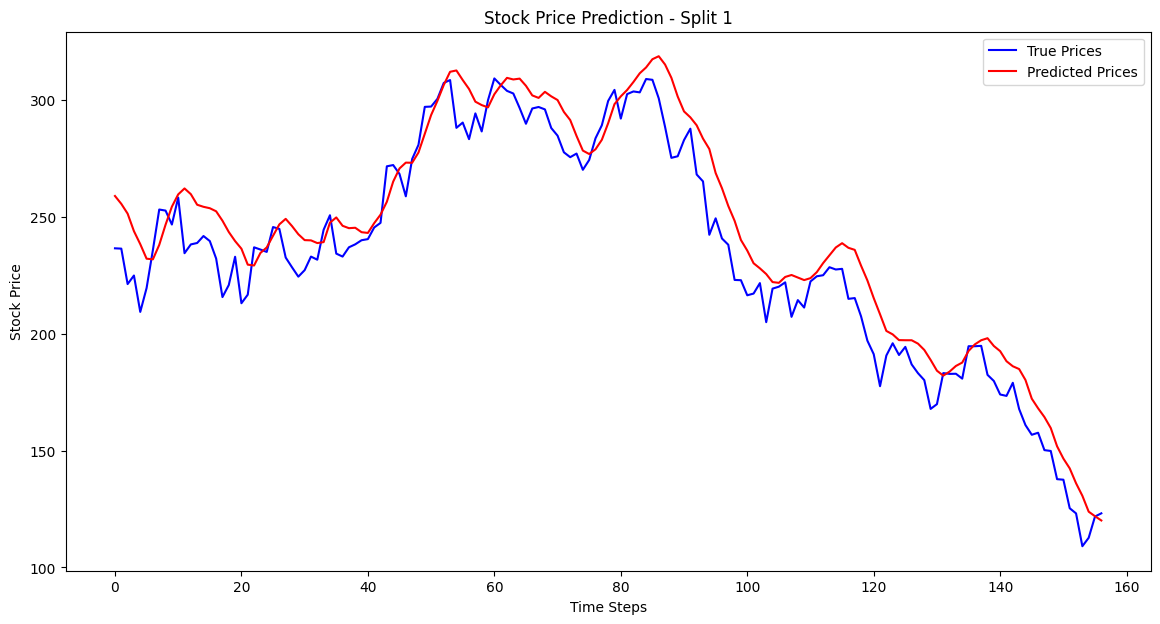

Split 2: MSE: 204.12121368288345, RMSE: 14.287099554594118, MAE: 11.680395624440187, R²: 0.9138271612730597


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 2')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 2: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}")

## RNN Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner import RandomSearch


# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features and fit
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Initialise variables to store the best model and metrics
best_model = None
best_mse = float('inf')
best_params = {}

[*********************100%***********************]  1 of 1 completed


In [ ]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()

    # Add SimpleRNN layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(SimpleRNN(units=hp.Int('units', min_value=50, max_value=150, step=10),
                           activation=activation,
                           return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN2_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])


    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model  # Return the best model as well

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_2_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_2_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_2_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 00m 19s]
val_loss: 2475.2548828125

Best val_loss So Far: 487.1876525878906
Total elapsed time: 00h 03m 46s
Best Hyperparameters:
Number of Layers: 3
units: 80
Dropout Rate: 0.4
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 198.3690 - mean_absolute_error: 6.9966 - mean_squared_error: 198.3690 - val_loss: 811.0006 - val_mean_absolute_error: 18.7596 - val_mean_squared_error: 811.0006
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 202.3177 - mean_absolute_error: 6.9768 - mean_squared_error: 202.3177 - val_loss: 483.7334 - val_mean_absolute_error: 18.7565 - val_mean_squared_error: 483.7334
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 215.4519 - mean_absolute_error: 7.1957 - mean_squared_error: 215.4519 - val_loss: 484.6018 - val_mean_absolute_error: 16.4563 - val_mean_squared_error: 484.6018
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 214.0761 - mean_absolute_error: 6.9069 - mean_squared_error: 214.0761 - val_loss: 470.0397 - val_mean_absolute_error: 16.2046 - val_mean_squared_error: 470.0397
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 173.7220 - mean_absolute_error: 6.6052 - mean_squared_error: 173.7220 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 424.1897 - mean_absolute_error: 10.5549 - mean_squared_error: 424.1897 - val_loss: 1166.3352 - val_mean_absolute_error: 27.5227 - val_mean_squared_error: 1166.3352
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 374.2854 - mean_absolute_error: 10.0072 - mean_squared_error: 374.2854 - val_loss: 1030.2545 - val_mean_absolute_error: 25.6127 - val_mean_squared_error: 1030.2545
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 398.2085 - mean_absolute_error: 10.1624 - mean_squared_error: 398.2085 - val_loss: 907.6186 - val_mean_absolute_error: 23.7923 - val_mean_squared_error: 907.6186
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 406.2352 - mean_absolute_error: 10.5284 - mean_squared_error: 406.2352 - val_loss: 1230.8678 - val_mean_absolute_error: 28.5855 - val_mean_squared_error: 1230.8678
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 425.4880 - mean_absolute_error: 10.3751 - mean_squared_error: 425.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 24.2009 - mean_absolute_error: 3.6760 - mean_squared_error: 24.2009 - val_loss: 178.6609 - val_mean_absolute_error: 10.4626 - val_mean_squared_error: 178.6609
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 20.9403 - mean_absolute_error: 3.2717 - mean_squared_error: 20.9403 - val_loss: 216.3319 - val_mean_absolute_error: 10.7304 - val_mean_squared_error: 216.3319
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.6243 - mean_absolute_error: 3.1380 - mean_squared_error: 19.6243 - val_loss: 184.8593 - val_mean_absolute_error: 10.8217 - val_mean_squared_error: 184.8593
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.4850 - mean_absolute_error: 3.3694 - mean_squared_error: 24.4850 - val_loss: 181.6447 - val_mean_absolute_error: 10.0080 - val_mean_squared_error: 181.6447
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 24.0880 - mean_absolute_error: 3.4316 - mean_squared_error: 24.0880 - val_loss: 1

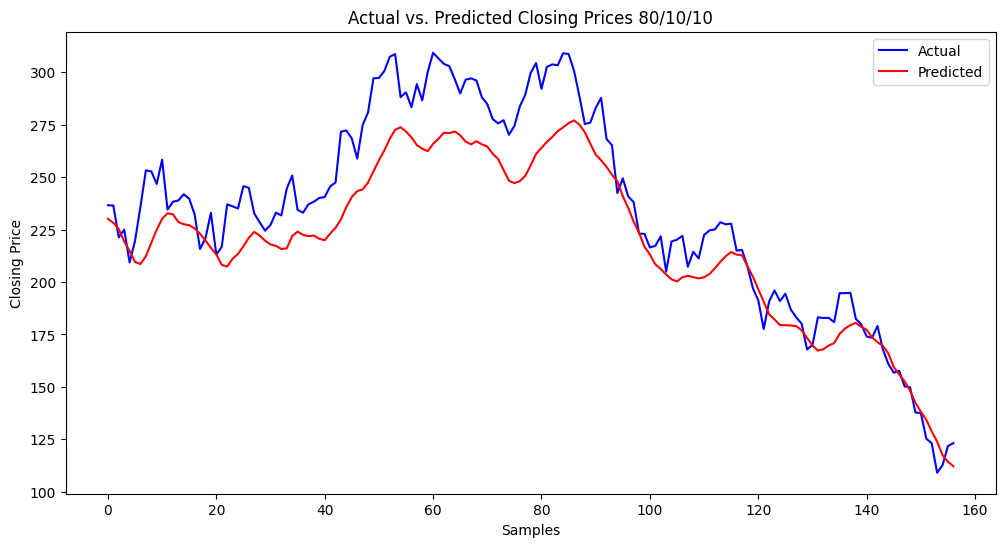

In [ ]:
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## RNN Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/RNN3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]

# Prepare X and y
X = df[feature_columns].values
y = df['Close'].values

# Standardise features and fit
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X.shape[1], X.shape[2])))

    # Add SimpleRNN layer
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu', return_sequences=True))

    # Adding additional SimpleRNN layers according to hyperparameters
    for _ in range(hp.Int('num_layers', 1, 5)):
        model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                             activation='relu', return_sequences=True))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))
    # Final RNN layer without return_sequences
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=16),
                         activation='relu'))

    # Output layer for regression
    model.add(Dense(1))

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='RNN3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, RNN_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, RNN_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, RNN_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 01s]
val_loss: 789.7359008789062

Best val_loss So Far: 368.4161682128906
Total elapsed time: 00h 09m 32s
Best Hyperparameters:
Number of Layers: 1
units: 48
Dropout Rate: 0.3
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 3556.7871 - mean_absolute_error: 36.5690 - mean_squared_error: 3556.7871 - val_loss: 4700.7427 - val_mean_absolute_error: 64.2777 - val_mean_squared_error: 4700.7427
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 410.4489 - mean_absolute_error: 14.1729 - mean_squared_error: 410.4489 - val_loss: 1577.4556 - val_mean_absolute_error: 35.2065 - val_mean_squared_error: 1577.4556
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 259.7763 - mean_absolute_error: 10.6185 - mean_squared_error: 259.7763 - val_loss: 1546.6210 - val_mean_absolute_error: 34.9206 - val_mean_squared_error: 1546.6210
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 144.5764 - mean_absolute_error: 7.8760 - mean_squared_error: 144.5764 - val_loss: 4752.9697 - val_mean_absolute_error: 64.7514 - val_mean_squared_error: 4752.9697
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 244.2775 - mean_absolute_error: 8.5700 - mean_squared_error

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 5459.8120 - mean_absolute_error: 46.0614 - mean_squared_error: 5459.8120 - val_loss: 27346.3105 - val_mean_absolute_error: 163.1923 - val_mean_squared_error: 27346.3105
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1787.8716 - mean_absolute_error: 25.9292 - mean_squared_error: 1787.8716 - val_loss: 6640.0952 - val_mean_absolute_error: 79.5151 - val_mean_squared_error: 6640.0952
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1296.9814 - mean_absolute_error: 22.3108 - mean_squared_error: 1296.9814 - val_loss: 778.7869 - val_mean_absolute_error: 23.8965 - val_mean_squared_error: 778.7869
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 341.8354 - mean_absolute_error: 11.4575 - mean_squared_error: 341.8354 - val_loss: 4871.4966 - val_mean_absolute_error: 67.6067 - val_mean_squared_error: 4871.4966
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 562.6272 - mean_absolute_error: 14.8042 - mean_square

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 550.3429 - mean_absolute_error: 19.7610 - mean_squared_error: 550.3429 - val_loss: 32938.0352 - val_mean_absolute_error: 173.7458 - val_mean_squared_error: 32938.0352
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 177.9367 - mean_absolute_error: 8.2462 - mean_squared_error: 177.9367 - val_loss: 33425.0234 - val_mean_absolute_error: 175.2549 - val_mean_squared_error: 33425.0234
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 135.8380 - mean_absolute_error: 7.6545 - mean_squared_error: 135.8380 - val_loss: 29912.4883 - val_mean_absolute_error: 165.7620 - val_mean_squared_error: 29912.4883
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 107.5392 - mean_absolute_error: 6.6578 - mean_squared_error: 107.5392 - val_loss: 18176.8477 - val_mean_absolute_error: 128.2217 - val_mean_squared_error: 18176.8477
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 83.0583 - mean_absolute_error: 6.4833 - mean_square

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Metrics for the 70/15/15 split: MSE: 1031.217564414971, RMSE: 32.112576421317726, MAE: 26.625922150307513, R²: 0.6566821460412537
Metrics for the 80/10/10 split: MSE: 4090.431474860499, RMSE: 63.95648110129652, MAE: 60.30554043715167, R²: -0.726837134891638
Metrics for the 60/20/20 split: MSE: 16285.105833130678, RMSE: 127.6131099579141, MAE: 117.67660176335052, R²: -3.192105683935326


In [ ]:
RNN_3_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 15, 48)              │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 15, 48)              │           4,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 48)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 48)                  │           4,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,285 (137.84 KB)

 Trainable params: 11,761 (45.94 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,524 (91.89 KB)

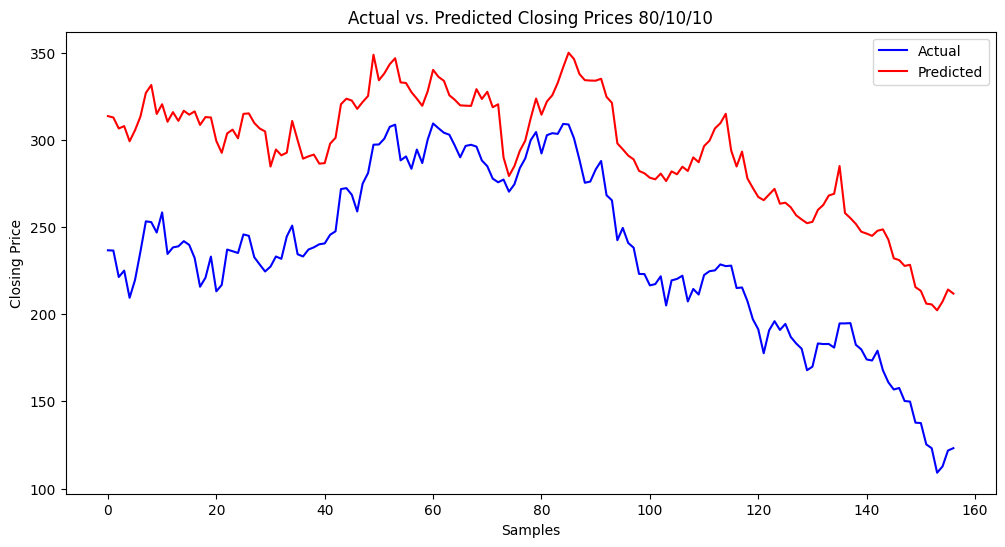

In [ ]:
import matplotlib.pyplot as plt
# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# LSTM

## LSTM 10 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get TSLA stock data for the past 10 years
data = yf.download('TSLA', start='2013-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0021 - mae: 0.0255 - mse: 0.0021
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 1.2798e-04 - mae: 0.0055 - mse: 1.2798e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 5.5944e-04 - mae: 0.0173 - mse: 5.5944e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.1888e-04 - mae: 0.0051 - mse: 1.1888e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 1.0038e-04 - mae: 0.0047 - mse: 1.0038e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 8.2270e-05 - mae: 0.0046 - mse: 8.2270e-05
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 9.2456e-05 - mae: 0.0046 - mse: 9.2456e-05
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 1.0210e-04 - mae: 0.0048 - mse: 1.0210e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 6.9167e-05 - mae: 0.0039 - mse: 6.9167e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 6.9960e-05 - mae: 0.0045 - mse

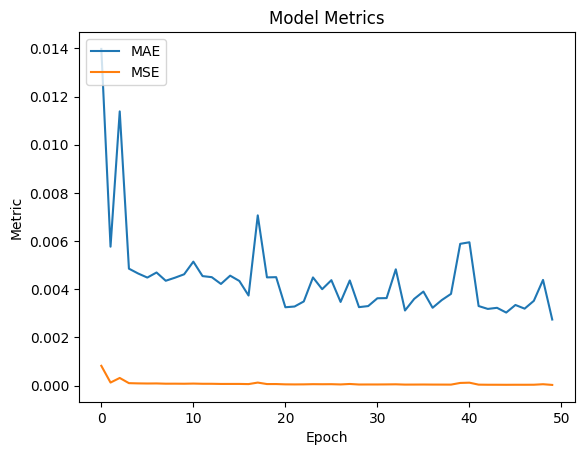

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## lstm 5 years

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get TSLA stock data for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')
df = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into training and testing sets (80/20 split)
training_data_len = int(len(df) * 0.8)
train_data = df[0:training_data_len, :]
test_data = df[training_data_len:, :]

# Prepare the data for the LSTM
def prepare_data(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback - 1):
        X.append(data[i:(i + lookback), 0])
        y.append(data[i + lookback, 0])
    return np.array(X), np.array(y)

lookback = 60  # Number of days to lookback
X_train, y_train = prepare_data(train_data, lookback)
X_test, y_test = prepare_data(test_data, lookback)

# Reshape the data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0352 - mae: 0.1120 - mse: 0.0352
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0018 - mae: 0.0238 - mse: 0.0018
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 0.0011 - mae: 0.0189 - mse: 0.0011
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0012 - mae: 0.0192 - mse: 0.0012
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0011 - mae: 0.0194 - mse: 0.0011
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0010 - mae: 0.0181 - mse: 0.0010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 8.7726e-04 - mae: 0.0162 - mse: 8.7726e-04
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0011 - mae: 0.0189 - mse: 0.0011
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0012 - mae: 0.0199 - mse: 0.0012
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 8.3579e-04 - mae: 0.0161 - mse: 8.3579e-04
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - 

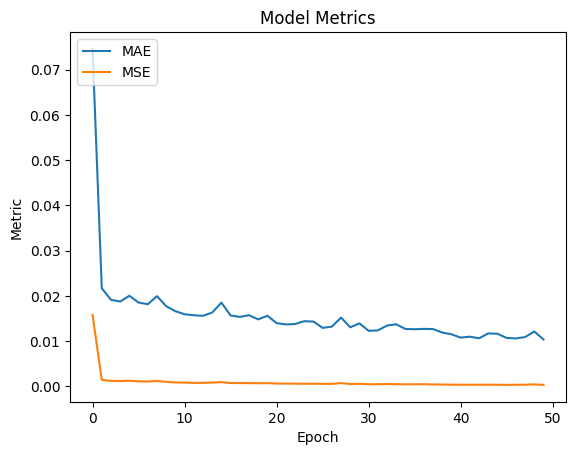

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test[0], predictions[:, 0]))
mse = mean_squared_error(y_test[0], predictions[:, 0])
mae = mean_absolute_error(y_test[0], predictions[:, 0])
r2 = r2_score(y_test[0], predictions[:, 0])

print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics within epochs
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

## LSTM feature Engineering

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for TSLA (7 years)
start_date = '2016-01-01'
end_date = '2023-01-01'
df = yf.download('TSLA', start=start_date, end=end_date)

# Feature Engineering
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
delta = df['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))
# Lagged Close Prices
for i in range(1, 6):
    df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

# Drop NaN values
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Define features and target
features = ['Close', 'SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']
target = 'Close'

# Extract features and target
data = df[features].values
target_data = df[target].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target_data)

# Split the data (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(scaled_data, scaled_target, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create sequences for LSTM
seq_length = 7
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(target[i+seq_length])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(X_train, y_train, seq_length)
X_val, y_val = create_sequences(X_val, y_val, seq_length)
X_test, y_test = create_sequences(X_test, y_test, seq_length)

In [ ]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, len(features))))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Make predictions
predictions = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions)
y_test = target_scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0101 - mae: 0.0605 - mse: 0.0101 - val_loss: 0.0052 - val_mae: 0.0469 - val_mse: 0.0052
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.1307e-04 - mae: 0.0164 - mse: 6.1307e-04 - val_loss: 0.0060 - val_mae: 0.0703 - val_mse: 0.0060
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7423e-04 - mae: 0.0099 - mse: 2.7423e-04 - val_loss: 0.0044 - val_mae: 0.0564 - val_mse: 0.0044
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8082e-04 - mae: 0.0097 - mse: 2.8082e-04 - val_loss: 0.0054 - val_mae: 0.0668 - val_mse: 0.0054
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2537e-04 - mae: 0.0078 - mse: 2.2537e-04 - val_loss: 0.0067 - val_mae: 0.0754 - val_mse: 0.0067
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7231e-04 - mae: 0.0093 - mse: 2.7231e-04 - val_loss: 0.0043 - val_mae: 0.0574 - val_mse: 0.0043
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9945e-04 - mae: 

RMSE: 16.53002679023456
MSE: 273.24178568587234
MAE: 13.502589108651144
R-squared: 0.9099869334718853


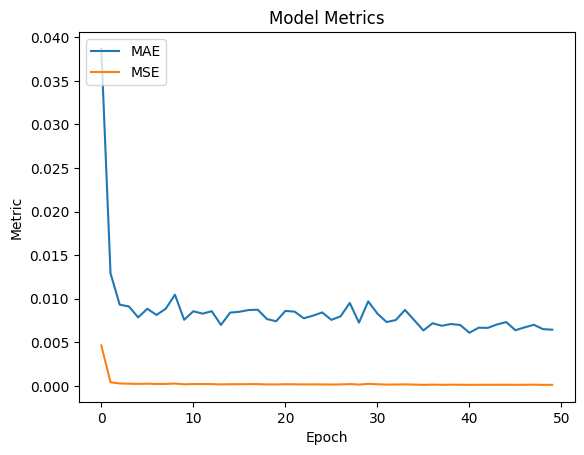

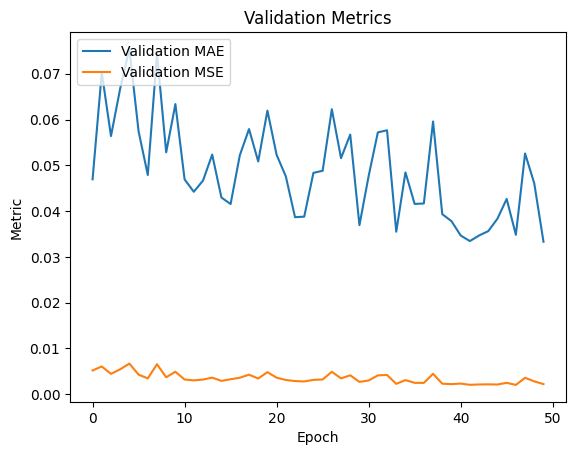

In [ ]:
print('RMSE:', rmse)
print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)

# Plot training metrics
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.title('Model Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSE'], loc='upper left')
plt.show()

# Plot validation metrics
plt.plot(history.history['val_mae'])
plt.plot(history.history['val_mse'])
plt.title('Validation Metrics')
plt.ylabel('Metric')
plt.xlabel('Epoch')
plt.legend(['Validation MAE', 'Validation MSE'], loc='upper left')
plt.show()

## lstm  hyperparameter

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping


# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Prepare data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1765, random_state=42)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Models
model1 = Sequential()
model1.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

model2 = Sequential()
model2.add(LSTM(64, activation='relu', input_shape=(seq_length, 1)))
model2.add(Dropout(0.25))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

model3 = Sequential()
model3.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model3.add(LSTM(32, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train models
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Function to evaluate model with additional metrics
def evaluate_model(model, X_test, y_test, scaler):
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return rmse, mae, mse, r2

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0728 - val_loss: 0.0040
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 7.5328e-04
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2829e-04 - val_loss: 5.0267e-04
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5749e-04 - val_loss: 5.0798e-04
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1588e-04 - val_loss: 4.6774e-04
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.0218e-04 - val_loss: 4.5235e-04
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.6130e-04 - val_loss: 4.6719e-04
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.7543e-04 - val_loss: 4.3115e-04
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.1385e-04 - val_loss: 5.0427e-04
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.3426e-04 - val_loss: 4.4077e-04
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3140e-04 - val_loss: 4.5

In [ ]:
# Evaluate models on the test set
rmse1, mae1, mse1, r2_1 = evaluate_model(model1, X_test, y_test, scaler)
rmse2, mae2, mse2, r2_2 = evaluate_model(model2, X_test, y_test, scaler)
rmse3, mae3, mse3, r2_3 = evaluate_model(model3, X_test, y_test, scaler)

# Print evaluation metrics
print("Model 1 (Basic LSTM) - RMSE:", rmse1, "MAE:", mae1, "MSE:", mse1, "R^2:", r2_1)
print("Model 2 (LSTM with Dropout) - RMSE:", rmse2, "MAE:", mae2, "MSE:", mse2, "R^2:", r2_2)
print("Model 3 (Deeper LSTM) - RMSE:", rmse3, "MAE:", mae3, "MSE:", mse3, "R^2:", r2_3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Model 1 (Basic LSTM) - RMSE: 5.986237957791974 MAE: 3.415495688265021 MSE: 35.83504488730942 R^2: 0.9968605463626866
Model 2 (LSTM with Dropout) - RMSE: 17.07740113928806 MAE: 15.964771964333274 MSE: 291.6376296721571 R^2: 0.9744500719859307
Model 3 (Deeper LSTM) - RMSE: 33.342489246365986 MAE: 30.911695899385393 MSE: 1111.7215891440314 R^2: 0.9026037668518725


## LSTM Combine 1

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM1_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardie features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 3)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM1_Stock_Prediction'
    )

    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 44s]
val_loss: 35811.65625

Best val_loss So Far: 1943.3673095703125
Total elapsed time: 00h 06m 08s
Best Hyperparameters:
Number of Layers: 2
units: 150
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 81.4843 - mean_absolute_error: 4.5294 - mean_squared_error: 81.4843 - val_loss: 2320.4429 - val_mean_absolute_error: 41.7046 - val_mean_squared_error: 2320.4429
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 61.4584 - mean_absolute_error: 3.9614 - mean_squared_error: 61.4584 - val_loss: 2734.2478 - val_mean_absolute_error: 46.8973 - val_mean_squared_error: 2734.2478
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 58.1409 - mean_absolute_error: 4.1613 - mean_squared_error: 58.1409 - val_loss: 2617.5889 - val_mean_absolute_error: 46.2535 - val_mean_squared_error: 2617.5889
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 46.9377 - mean_absolute_error: 3.8386 - mean_squared_error: 46.9377 - val_loss: 2105.0493 - val_mean_absolute_error: 36.8375 - val_mean_squared_error: 2105.0493
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 50.6847 - mean_absolute_error: 4.1128 - mean_squared_error: 50.6847 - va

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 136.2882 - mean_absolute_error: 5.9736 - mean_squared_error: 136.2882 - val_loss: 3535.8494 - val_mean_absolute_error: 49.4631 - val_mean_squared_error: 3535.8494
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 111.9569 - mean_absolute_error: 5.7852 - mean_squared_error: 111.9569 - val_loss: 3443.6848 - val_mean_absolute_error: 48.2599 - val_mean_squared_error: 3443.6848
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 102.5959 - mean_absolute_error: 5.2661 - mean_squared_error: 102.5959 - val_loss: 3513.4419 - val_mean_absolute_error: 49.2326 - val_mean_squared_error: 3513.4419
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 121.6154 - mean_absolute_error: 6.0016 - mean_squared_error: 121.6154 - val_loss: 3352.4612 - val_mean_absolute_error: 47.4185 - val_mean_squared_error: 3352.4612
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 82.4320 - mean_absolute_error: 5.0348 - mean_squared_error: 82.4

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 10.8769 - mean_absolute_error: 2.1293 - mean_squared_error: 10.8769 - val_loss: 356.8480 - val_mean_absolute_error: 15.0343 - val_mean_squared_error: 356.8480
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.2058 - mean_absolute_error: 2.1656 - mean_squared_error: 9.2058 - val_loss: 304.5893 - val_mean_absolute_error: 14.8831 - val_mean_squared_error: 304.5893
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3128 - mean_absolute_error: 2.0825 - mean_squared_error: 10.3128 - val_loss: 359.7166 - val_mean_absolute_error: 15.1245 - val_mean_squared_error: 359.7166
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.8484 - mean_absolute_error: 2.0662 - mean_squared_error: 8.8484 - val_loss: 305.8052 - val_mean_absolute_error: 14.6521 - val_mean_squared_error: 305.8052
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 12.3930 - mean_absolute_error: 2.2722 - mean_squared_error: 12.3930 - val_loss: 969.

Metrics for the 70/15/15 split: MSE: 1637.2749555283667, RMSE: 40.46325438627455, MAE: 34.4263983543883, R²: 0.4549106381917637
Metrics for the 80/10/10 split: MSE: 403.3818259244202, RMSE: 20.084367700388782, MAE: 17.33615695443123, R²: 0.829706298509636
Metrics for the 60/20/20 split: MSE: 3050.7994948213227, RMSE: 55.23404289766704, MAE: 43.53439379804812, R²: 0.21466436670194766


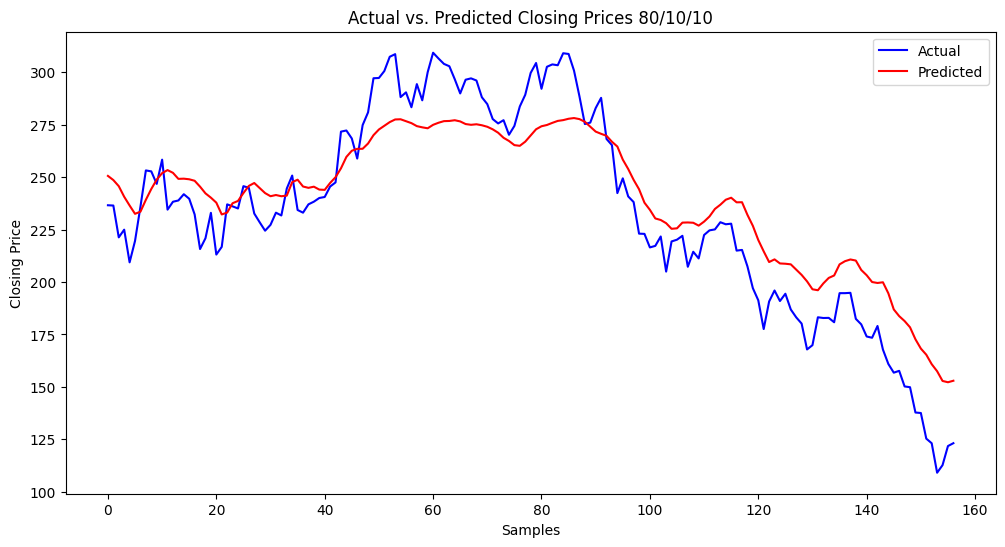

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 2

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM2_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import keras_tuner as kt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam
from keras.layers import Input, Flatten

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)
    df.dropna(inplace=True)
    return df

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

# Apply feature engineering
df = feature_engineering(df)

# Prepare data
X = df[['SMA_50', 'SMA_200', 'RSI', 'Close_Lagged_1', 'Close_Lagged_2', 'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5']].values
y = df['Close'].values

# Standardise features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM2_Stock_Prediction'
    )

    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                 callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"Units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

Trial 10 Complete [00h 00m 24s]
val_loss: 51496.79296875

Best val_loss So Far: 183.5317840576172
Total elapsed time: 00h 05m 34s
Best Hyperparameters:
Number of Layers: 3
Units: 130
Dropout Rate: 0.4
Learning Rate: 0.001
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 257.9138 - mean_absolute_error: 8.1439 - mean_squared_error: 257.9138 - val_loss: 676.3541 - val_mean_absolute_error: 22.5058 - val_mean_squared_error: 676.3541
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 172.7871 - mean_absolute_error: 7.7150 - mean_squared_error: 172.7871 - val_loss: 2099.2212 - val_mean_absolute_error: 42.8125 - val_mean_squared_error: 2099.2212
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 178.1531 - mean_absolute_error: 7.3796 - mean_squared_error: 178.1531 - val_loss: 570.8467 - val_mean_absolute_error: 20.6726 - val_mean_squared_error: 570.8467
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 186.5744 - mean_absolute_error: 7.7203 - mean_squared_error: 186.5744 - val_loss: 2019.6158 - val_mean_absolute_error: 42.1964 - val_mean_squared_error: 2019.6158
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 121.6807 - mean_absolute_error: 6.7581 - mean_squared_error: 121.680

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 360.2960 - mean_absolute_error: 11.1466 - mean_squared_error: 360.2960 - val_loss: 354.3962 - val_mean_absolute_error: 15.3267 - val_mean_squared_error: 354.3962
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 413.0310 - mean_absolute_error: 11.1457 - mean_squared_error: 413.0310 - val_loss: 509.3066 - val_mean_absolute_error: 18.9413 - val_mean_squared_error: 509.3066
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 305.9970 - mean_absolute_error: 10.0305 - mean_squared_error: 305.9970 - val_loss: 373.5128 - val_mean_absolute_error: 15.8787 - val_mean_squared_error: 373.5128
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 321.6416 - mean_absolute_error: 10.4002 - mean_squared_error: 321.6416 - val_loss: 323.9639 - val_mean_absolute_error: 14.0916 - val_mean_squared_error: 323.9639
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 296.3381 - mean_absolute_error: 9.6689 - mean_squared_error: 296.338

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 31.9134 - mean_absolute_error: 4.3091 - mean_squared_error: 31.9134 - val_loss: 2316.9272 - val_mean_absolute_error: 40.7001 - val_mean_squared_error: 2316.9272
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 34.7883 - mean_absolute_error: 4.2767 - mean_squared_error: 34.7883 - val_loss: 7016.0664 - val_mean_absolute_error: 74.1972 - val_mean_squared_error: 7016.0664
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 30.5340 - mean_absolute_error: 4.1388 - mean_squared_error: 30.5340 - val_loss: 6734.8564 - val_mean_absolute_error: 72.1955 - val_mean_squared_error: 6734.8564
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 29.1886 - mean_absolute_error: 3.8197 - mean_squared_error: 29.1886 - val_loss: 7501.9688 - val_mean_absolute_error: 76.3640 - val_mean_squared_error: 7501.9688
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.2746 - mean_absolute_error: 4.0779 - mean_squared_error: 32.2746 - va

Metrics for the 70/15/15 split: MSE: 697.6010674184143, RMSE: 26.41213863772516, MAE: 23.388975037919714, R²: 0.7677513362359254
Metrics for the 80/10/10 split: MSE: 159.69095966055067, RMSE: 12.63688884419542, MAE: 10.593044013734076, R²: 0.9325840608886558
Metrics for the 60/20/20 split: MSE: 32203.080532150794, RMSE: 179.4521678112326, MAE: 174.80939744455745, R²: -7.289704612444879


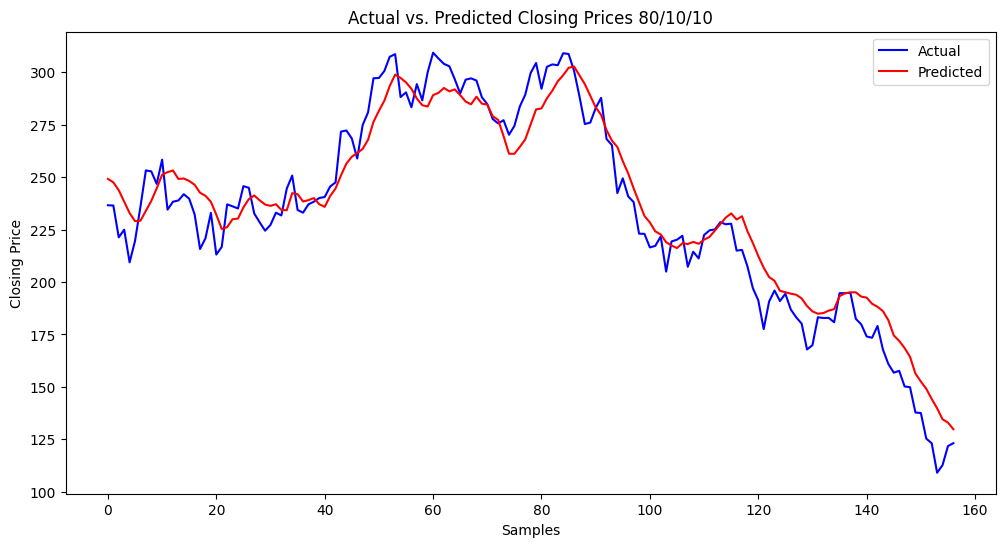

In [ ]:
# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

# Graph Actual vs Predicted for the first split
plt.figure(figsize=(12, 6))
plt.plot(y_test_2, label='Actual', color='blue')
plt.plot(y_pred_2, label='Predicted', color='red')
plt.title('Actual vs. Predicted Closing Prices 80/10/10')
plt.xlabel('Samples')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

## LSTM Combine 3

In [ ]:
import shutil
import os

# Directory where the tuner is saving its state
tuner_dir = 'project_dir/LSTM3_Stock_Prediction'

# Remove the existing tuner directory
if os.path.exists(tuner_dir):
    shutil.rmtree(tuner_dir)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical data for TSLA
df = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Function for feature engineering
def feature_engineering(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['RSI'] = compute_rsi(df['Close'])
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Bollinger_High'] = df['SMA_50'] + (df['Close'].rolling(window=50).std() * 2)
    df['Bollinger_Low'] = df['SMA_50'] - (df['Close'].rolling(window=50).std() * 2)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year

    for i in range(1, 6):
        df[f'Close_Lagged_{i}'] = df['Close'].shift(i)

    df.dropna(inplace=True)
    return df

# RSI computation function
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


# Apply feature engineering
df = feature_engineering(df)

# Select features and target
feature_columns = [
    'SMA_50', 'SMA_200', 'RSI', 'MACD',
    'Bollinger_High', 'Bollinger_Low',
    'Volatility', 'Day', 'Month', 'Year',
    'Close_Lagged_1', 'Close_Lagged_2',
    'Close_Lagged_3', 'Close_Lagged_4', 'Close_Lagged_5'
]
X = df[feature_columns].values
y = df['Close'].values


scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

[*********************100%***********************]  1 of 1 completed


In [ ]:
def build_model(hp):
    model = Sequential()

    # Add LSTM layers
    for i in range(hp.Int('num_layers', 1, 4)):
        activation = hp.Choice(f'activation_{i}', ['relu', 'tanh', 'sigmoid'])
        model.add(LSTM(units=hp.Int('units', min_value=50, max_value=150, step=10),
                       activation=activation,
                       return_sequences=(i != hp.Int('num_layers', 1, 4) - 1)))
        model.add(Dropout(hp.Float('dropout', 0.3, 0.6, step=0.1)))

    # Add Flatten layer
    model.add(Flatten())

    # Add Dense layer with linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])),
        loss='mean_squared_error',
        metrics=['mean_absolute_error', 'mean_squared_error']
    )

    return model

In [ ]:
def run_model(X_train, y_train, X_val, y_val, X_test, y_test):
    tuner = kt.RandomSearch(
        build_model,
        objective='val_loss',
        max_trials=10,
        executions_per_trial=1,
        directory='project_dir',
        project_name='LSTM3_Stock_Prediction'
    )


    # Perform hyperparameter tuning
    tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val),  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

    best_model = tuner.get_best_models(num_models=1)[0]

    # Print best hyperparameters
    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    print("Best Hyperparameters:")
    print(f"Number of Layers: {best_hyperparameters.get('num_layers')}")
    print(f"units: {best_hyperparameters.get('units')}")
    print(f"Dropout Rate: {best_hyperparameters.get('dropout')}")
    print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")
    print("-" * 30)

    best_model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)])
    # Evaluation
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, rmse, mae, r2, y_pred, best_model

In [ ]:
# Split 1: 70/15/15
X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X, y, test_size=0.30, shuffle=False)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=0.5, shuffle=False)
mse_1, rmse_1, mae_1, r2_1, y_pred_1, LSTM_3_model_1 = run_model(X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1)

# Split 2: 80/10/10
X_train_2, X_temp_2, y_train_2, y_temp_2 = train_test_split(X, y, test_size=0.20, shuffle=False)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_temp_2, y_temp_2, test_size=0.5, shuffle=False)
mse_2, rmse_2, mae_2, r2_2, y_pred_2, LSTM_3_model_2 = run_model(X_train_2, y_train_2, X_val_2, y_val_2, X_test_2, y_test_2)

# Split 3: 60/20/20
X_train_3, X_temp_3, y_train_3, y_temp_3 = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val_3, X_test_3, y_val_3, y_test_3 = train_test_split(X_temp_3, y_temp_3, test_size=0.5, shuffle=False)
mse_3, rmse_3, mae_3, r2_3, y_pred_3, LSTM_3_model_3 = run_model(X_train_3, y_train_3, X_val_3, y_val_3, X_test_3, y_test_3)

# Compare MSE, RMSE, MAE, and R² from all splits
print(f'Metrics for the 70/15/15 split: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}')
print(f'Metrics for the 80/10/10 split: MSE: {mse_2}, RMSE: {rmse_2}, MAE: {mae_2}, R²: {r2_2}')
print(f'Metrics for the 60/20/20 split: MSE: {mse_3}, RMSE: {rmse_3}, MAE: {mae_3}, R²: {r2_3}')

Trial 10 Complete [00h 01m 17s]
val_loss: 22770.265625

Best val_loss So Far: 844.9622192382812
Total elapsed time: 00h 05m 29s
Best Hyperparameters:
Number of Layers: 2
units: 140
Dropout Rate: 0.4
Learning Rate: 0.01
------------------------------
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 130.9150 - mean_absolute_error: 6.6571 - mean_squared_error: 130.9150 - val_loss: 1099.1042 - val_mean_absolute_error: 23.5869 - val_mean_squared_error: 1099.1042
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 140.9022 - mean_absolute_error: 5.7097 - mean_squared_error: 140.9022 - val_loss: 1194.4983 - val_mean_absolute_error: 22.6969 - val_mean_squared_error: 1194.4983
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 144.7054 - mean_absolute_error: 6.9966 - mean_squared_error: 144.7054 - val_loss: 1273.9961 - val_mean_absolute_error: 23.4614 - val_mean_squared_error: 1273.9961
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 191.8916 - mean_absolute_error: 8.9577 - mean_squared_error: 191.8916 - val_loss: 1022.6522 - val_mean_absolute_error: 24.9868 - val_mean_squared_error: 1022.6522
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 118.7307 - mean_absolute_error: 5.8811 - mean_squared_error: 118

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 259.0531 - mean_absolute_error: 9.5940 - mean_squared_error: 259.0531 - val_loss: 2337.1753 - val_mean_absolute_error: 40.2061 - val_mean_squared_error: 2337.1753
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 235.3229 - mean_absolute_error: 8.4856 - mean_squared_error: 235.3229 - val_loss: 2865.6802 - val_mean_absolute_error: 46.3785 - val_mean_squared_error: 2865.6802
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 215.4489 - mean_absolute_error: 8.3322 - mean_squared_error: 215.4489 - val_loss: 1456.3407 - val_mean_absolute_error: 30.7347 - val_mean_squared_error: 1456.3407
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 246.1168 - mean_absolute_error: 8.8539 - mean_squared_error: 246.1168 - val_loss: 1871.1863 - val_mean_absolute_error: 36.3672 - val_mean_squared_error: 1871.1863
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 187.8684 - mean_absolute_error: 7.6452 - mean_squared_error: 187.86

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 30.2457 - mean_absolute_error: 4.0388 - mean_squared_error: 30.2457 - val_loss: 594.1791 - val_mean_absolute_error: 20.5011 - val_mean_squared_error: 594.1791
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.1963 - mean_absolute_error: 3.3669 - mean_squared_error: 21.1963 - val_loss: 266.1621 - val_mean_absolute_error: 13.0420 - val_mean_squared_error: 266.1621
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 14.3533 - mean_absolute_error: 2.6910 - mean_squared_error: 14.3533 - val_loss: 224.8347 - val_mean_absolute_error: 11.9386 - val_mean_squared_error: 224.8347
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 32.1697 - mean_absolute_error: 4.1424 - mean_squared_error: 32.1697 - val_loss: 176.0750 - val_mean_absolute_error: 10.2588 - val_mean_squared_error: 176.0750
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 18.1943 - mean_absolute_error: 3.1752 - mean_squared_error: 18.1943 - val_loss: 

In [ ]:
LSTM_3_model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 140)              │          87,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 140)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 140)                 │         157,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             141 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,585 (2.80 MB)

 Trainable params: 244,861 (956.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 489,724 (1.87 MB)

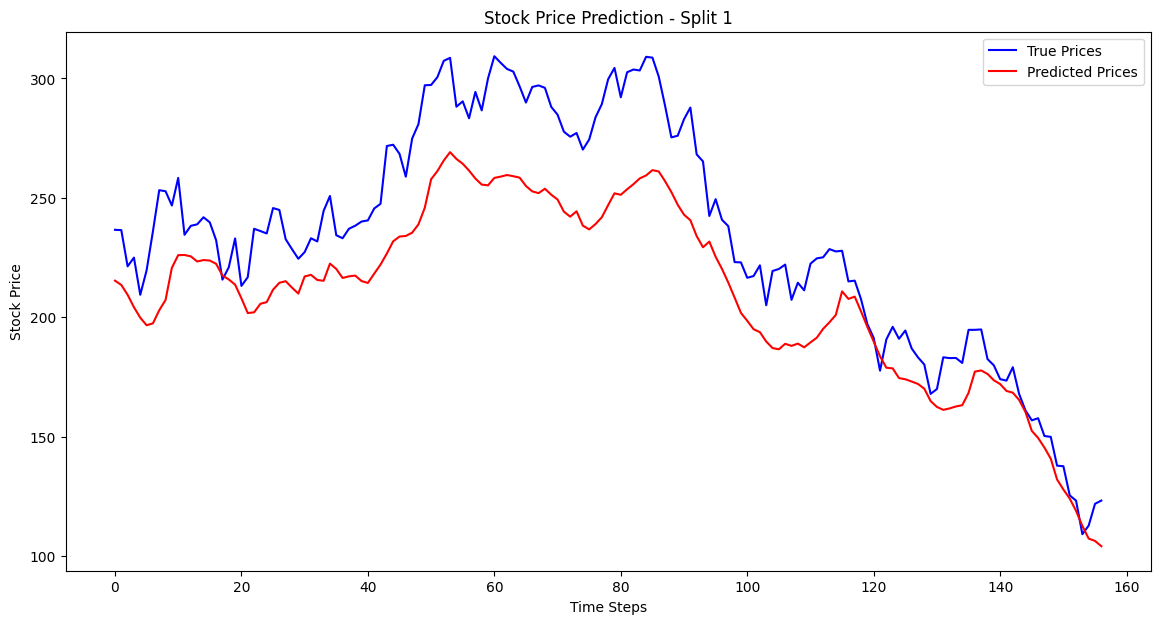

Split 1: MSE: 612.3720226847373, RMSE: 24.746151674244974, MAE: 21.061312476624835, R²: 0.7961261949879871


In [ ]:
# Plotting True vs Predicted Prices
import matplotlib.pyplot as plt
# Plot predictions for the first split
plt.figure(figsize=(14, 7))
plt.plot(y_test_2, label='True Prices', color='blue')
plt.plot(y_pred_2, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction - Split 1')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the results
print(f"Split 1: MSE: {mse_1}, RMSE: {rmse_1}, MAE: {mae_1}, R²: {r2_1}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('CNN1_best_model.h5')

# Now you can use `loaded_model` to make predictions
y_pred = loaded_model.predict(X_test_2)